In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.insert(0, os.environ['PLOT_SETTINGS_DIR'])
import plot_settings

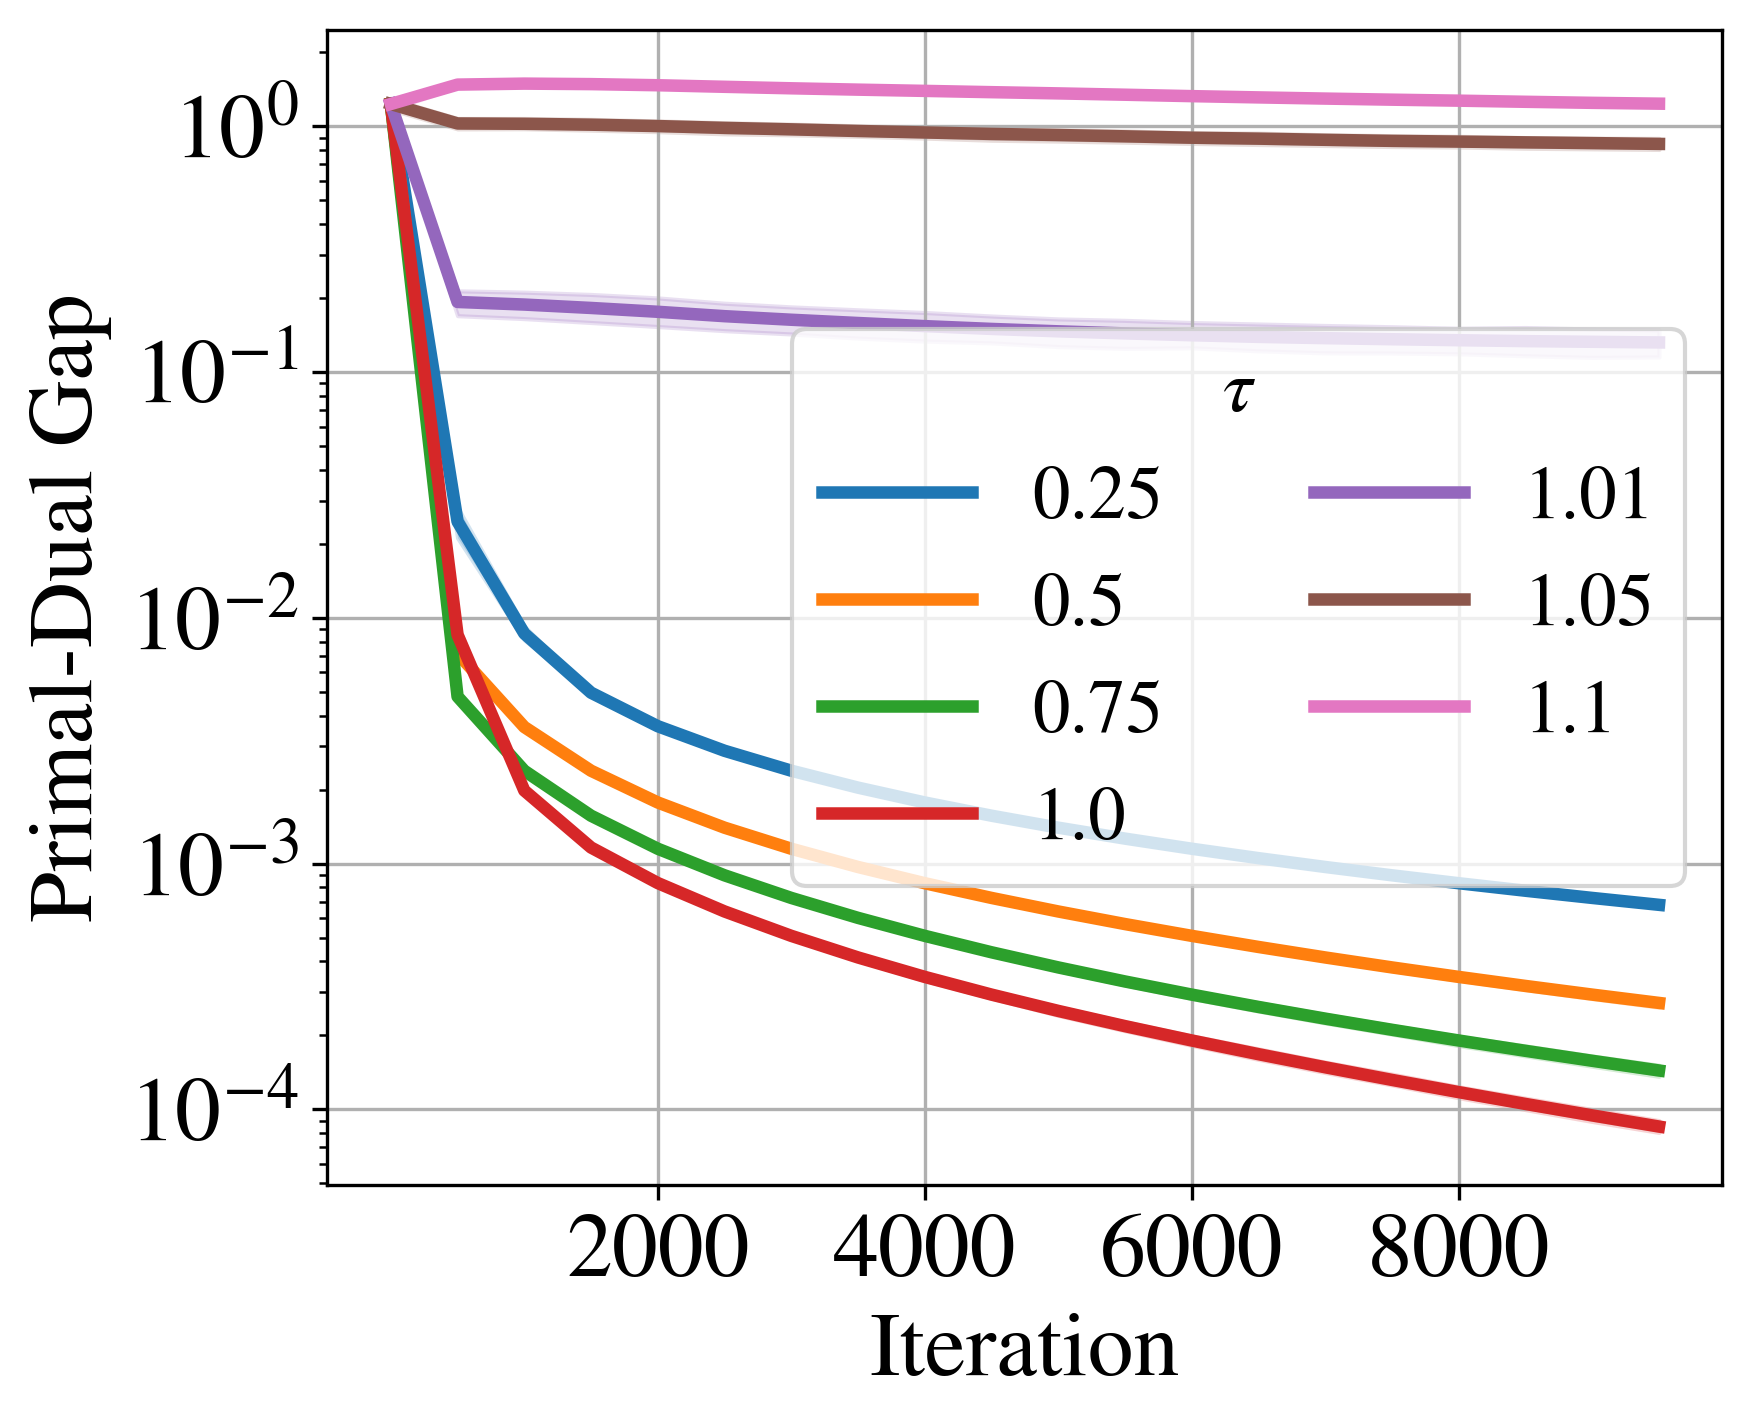

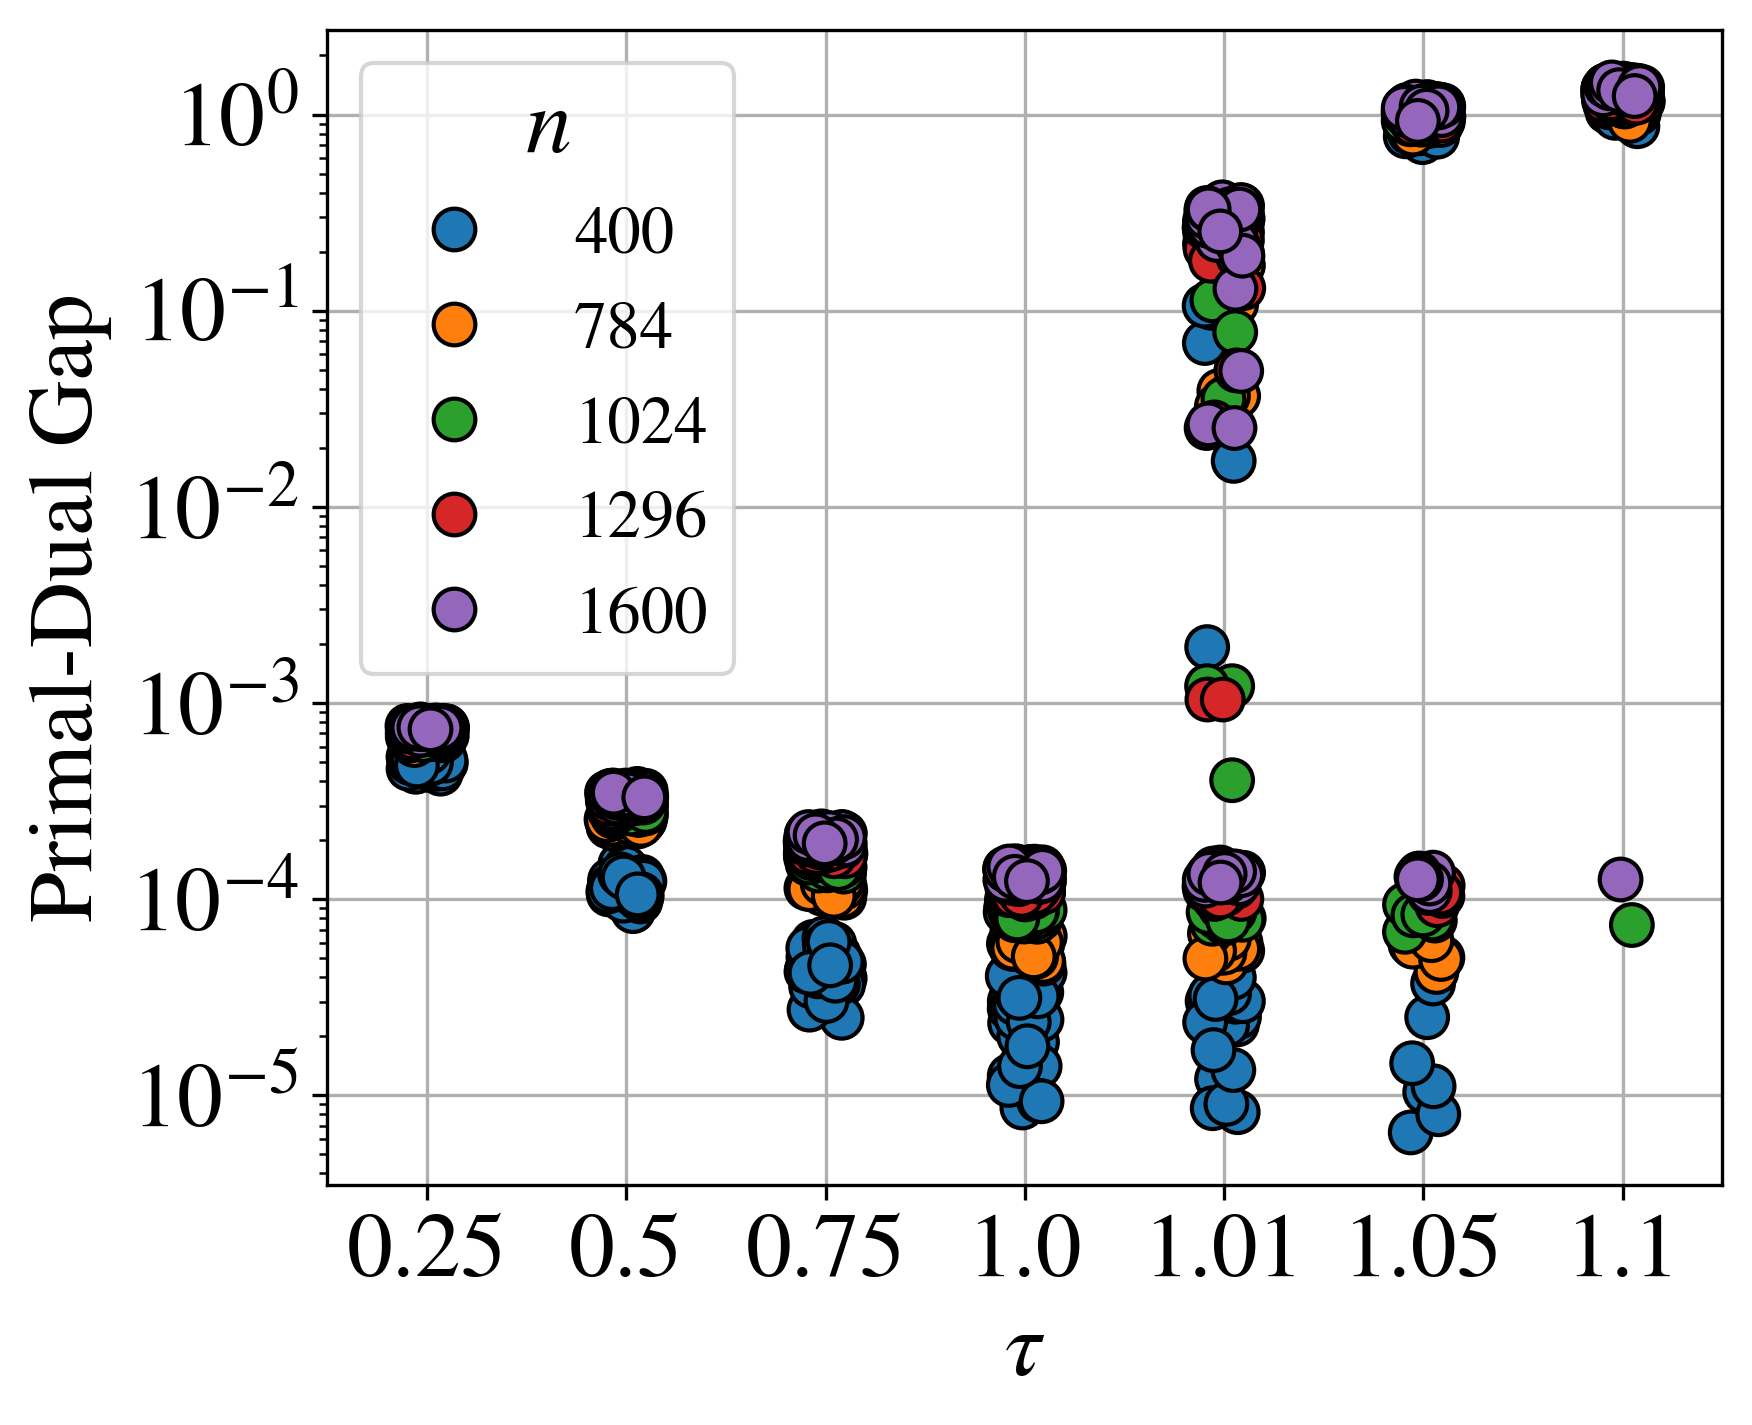

In [3]:
from matplotlib.ticker import FixedLocator
df = pd.read_csv("../data_archive/fig_1_stepsize_experiment_32.csv")
# df = df.query("N <= 1024")
df['pd_gap'] = df['primal'] - df['dual']
limdf = df.loc[(df['tau'] != 0.1) & (df['N'] > 100)]
# for n, sdf in df.groupby('N'):
fig, ax = plt.subplots(figsize=(6,5))
sns.lineplot(limdf,ax=ax, x='iter', y='pd_gap', hue='tau', palette = 'tab10', linewidth=3, err_style='band')
ax.set_yscale('log')
ax.legend(title='$\\tau$', title_fontsize=18, fontsize=18, ncols=2)
ax.set_ylabel("Primal-Dual Gap")
ax.set_xlabel("Iteration")
ax.xaxis.set_major_locator(FixedLocator([1000 * i for i in [2, 4, 6, 8]]))
ax.grid()
plt.show()
fig.savefig("../figures/tau_jump_lineplot.pdf", bbox_inches='tight')


fig, ax = plt.subplots(figsize=(6,5))
sns.stripplot(limdf.query("iter == 9501"), ax=ax, x="tau", y='pd_gap', hue='N', palette='tab10', s=10, edgecolor='k', linewidth=1)
ax.set_yscale('log')
ax.set_ylabel("Primal-Dual Gap")
ax.set_xlabel("$\\tau$")
ax.legend(title="$n$", bbox_to_anchor=(0,1), loc='upper left', fontsize=16)
ax.grid()
fig.savefig("../figures/tau_jump_stripplot.pdf", bbox_inches='tight')


/tmp/ipykernel_1642000/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


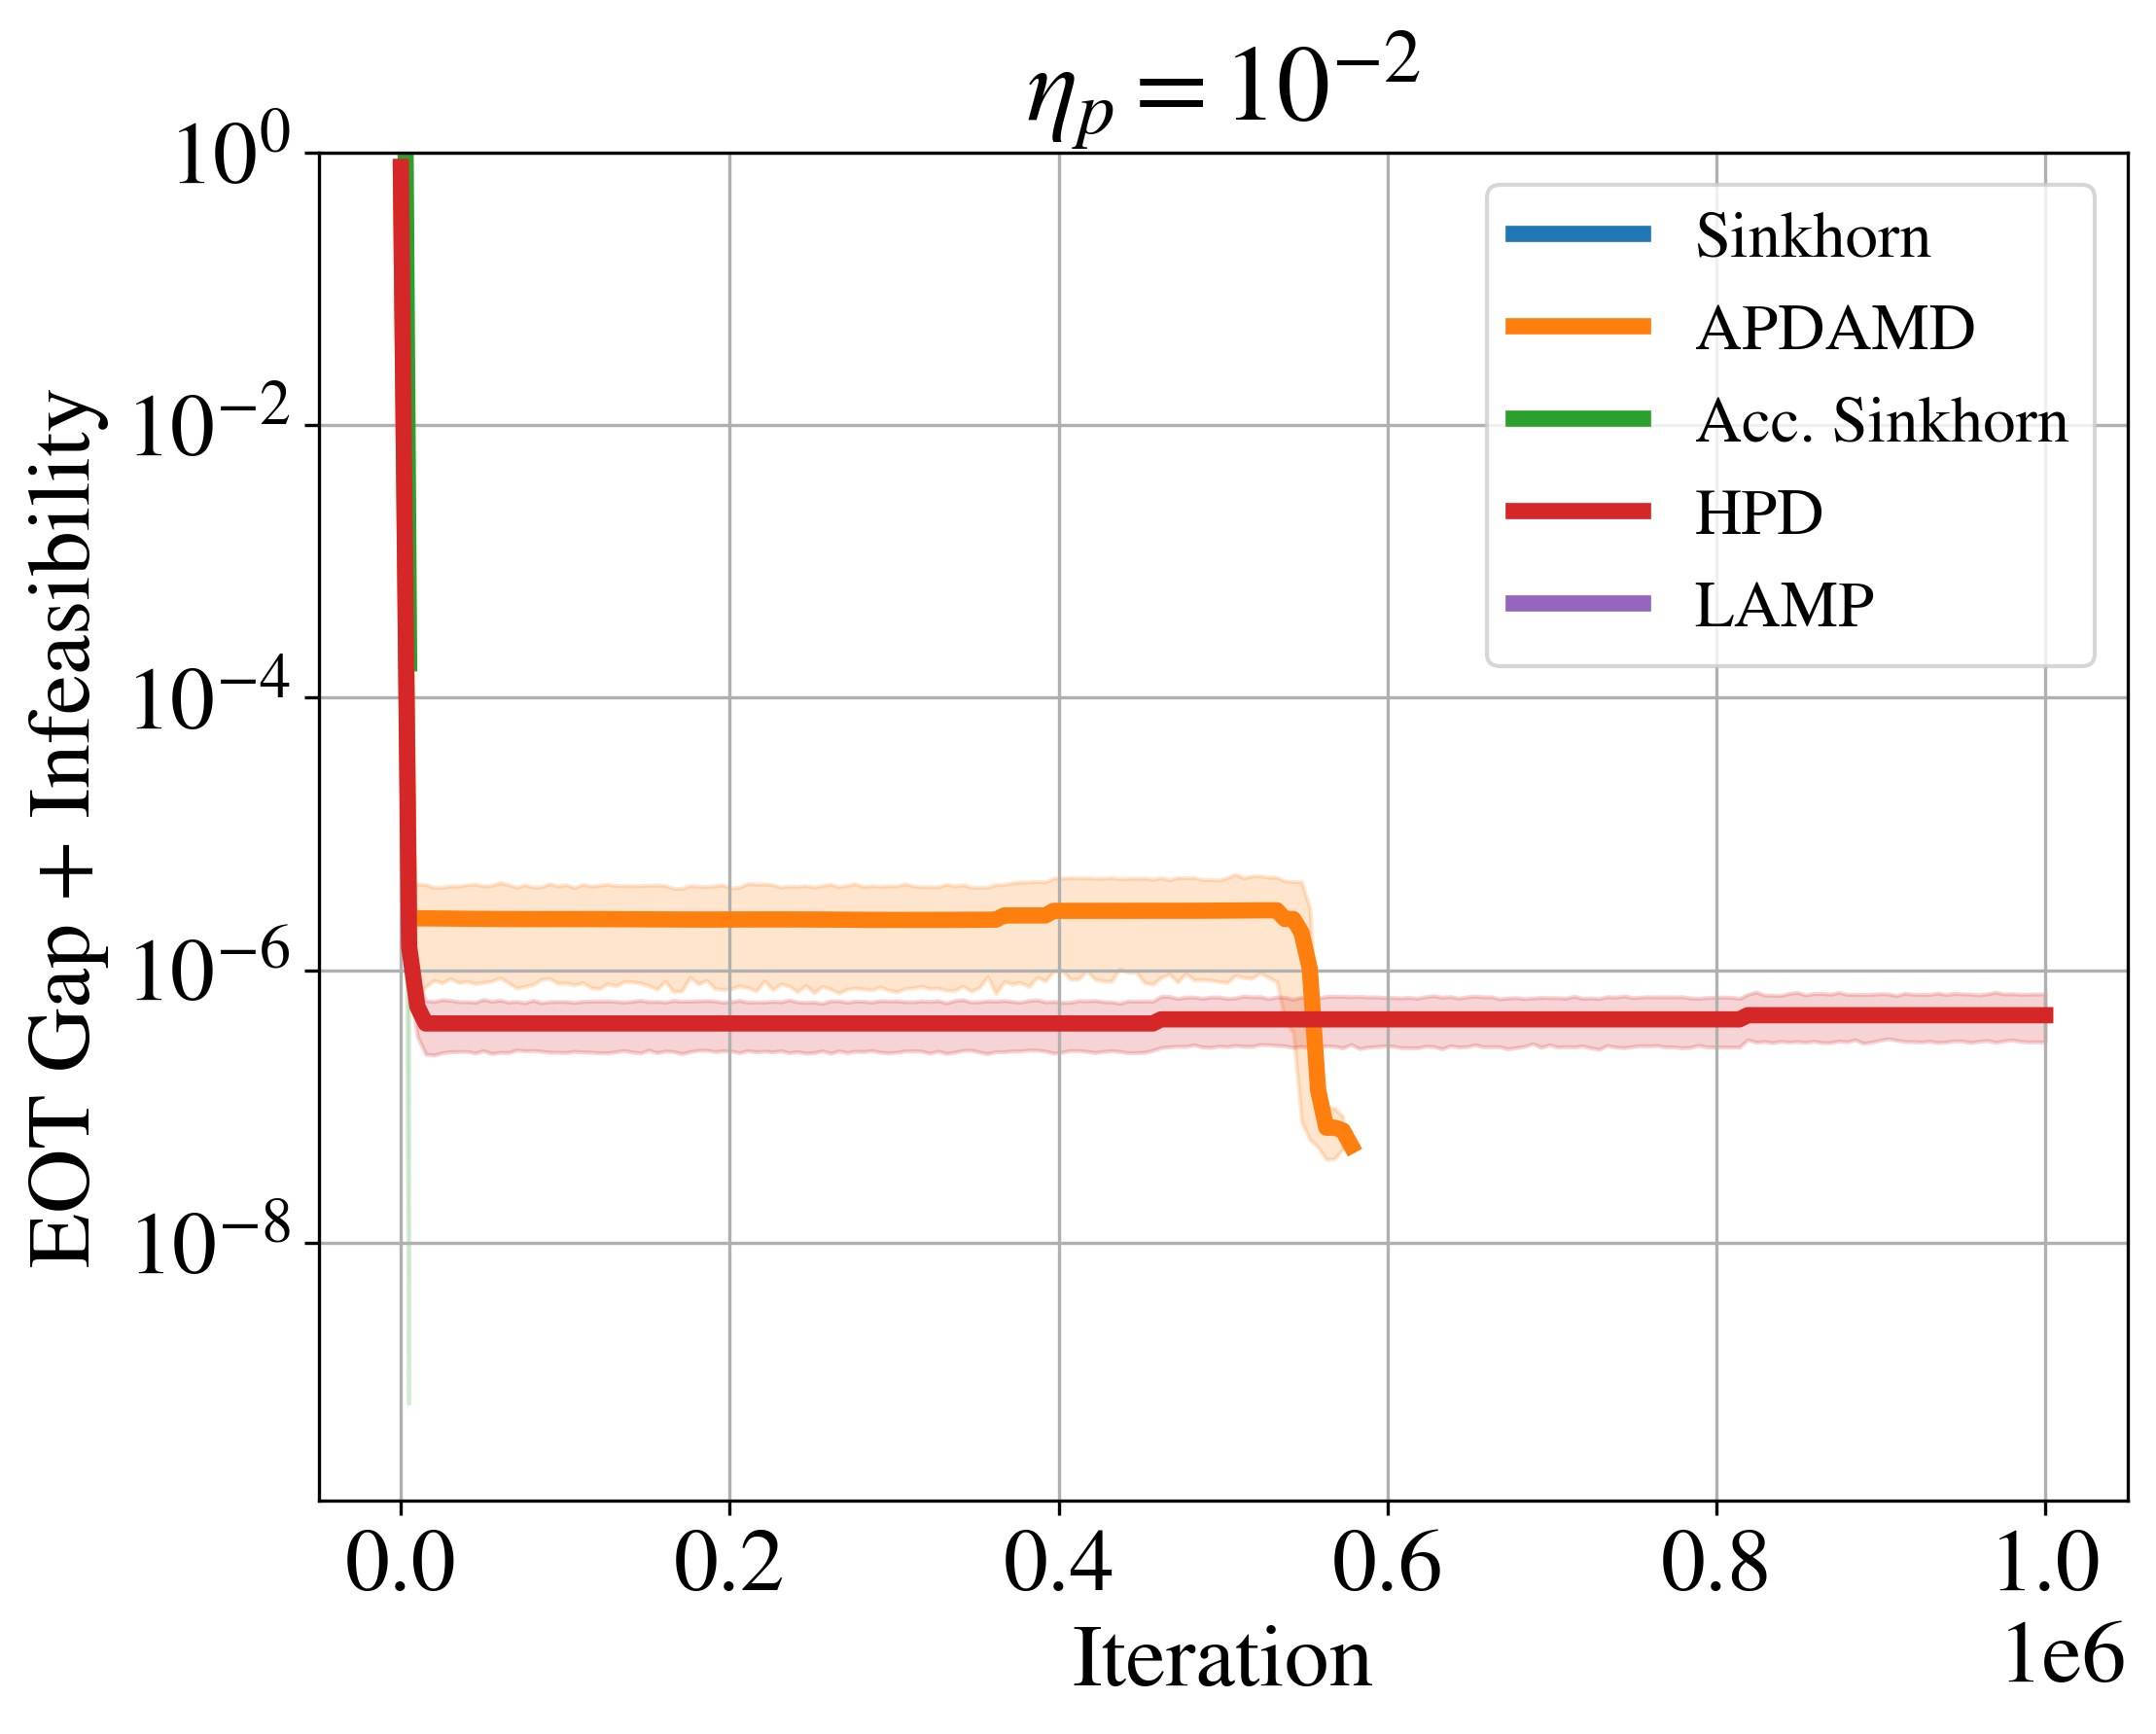

/tmp/ipykernel_1642000/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


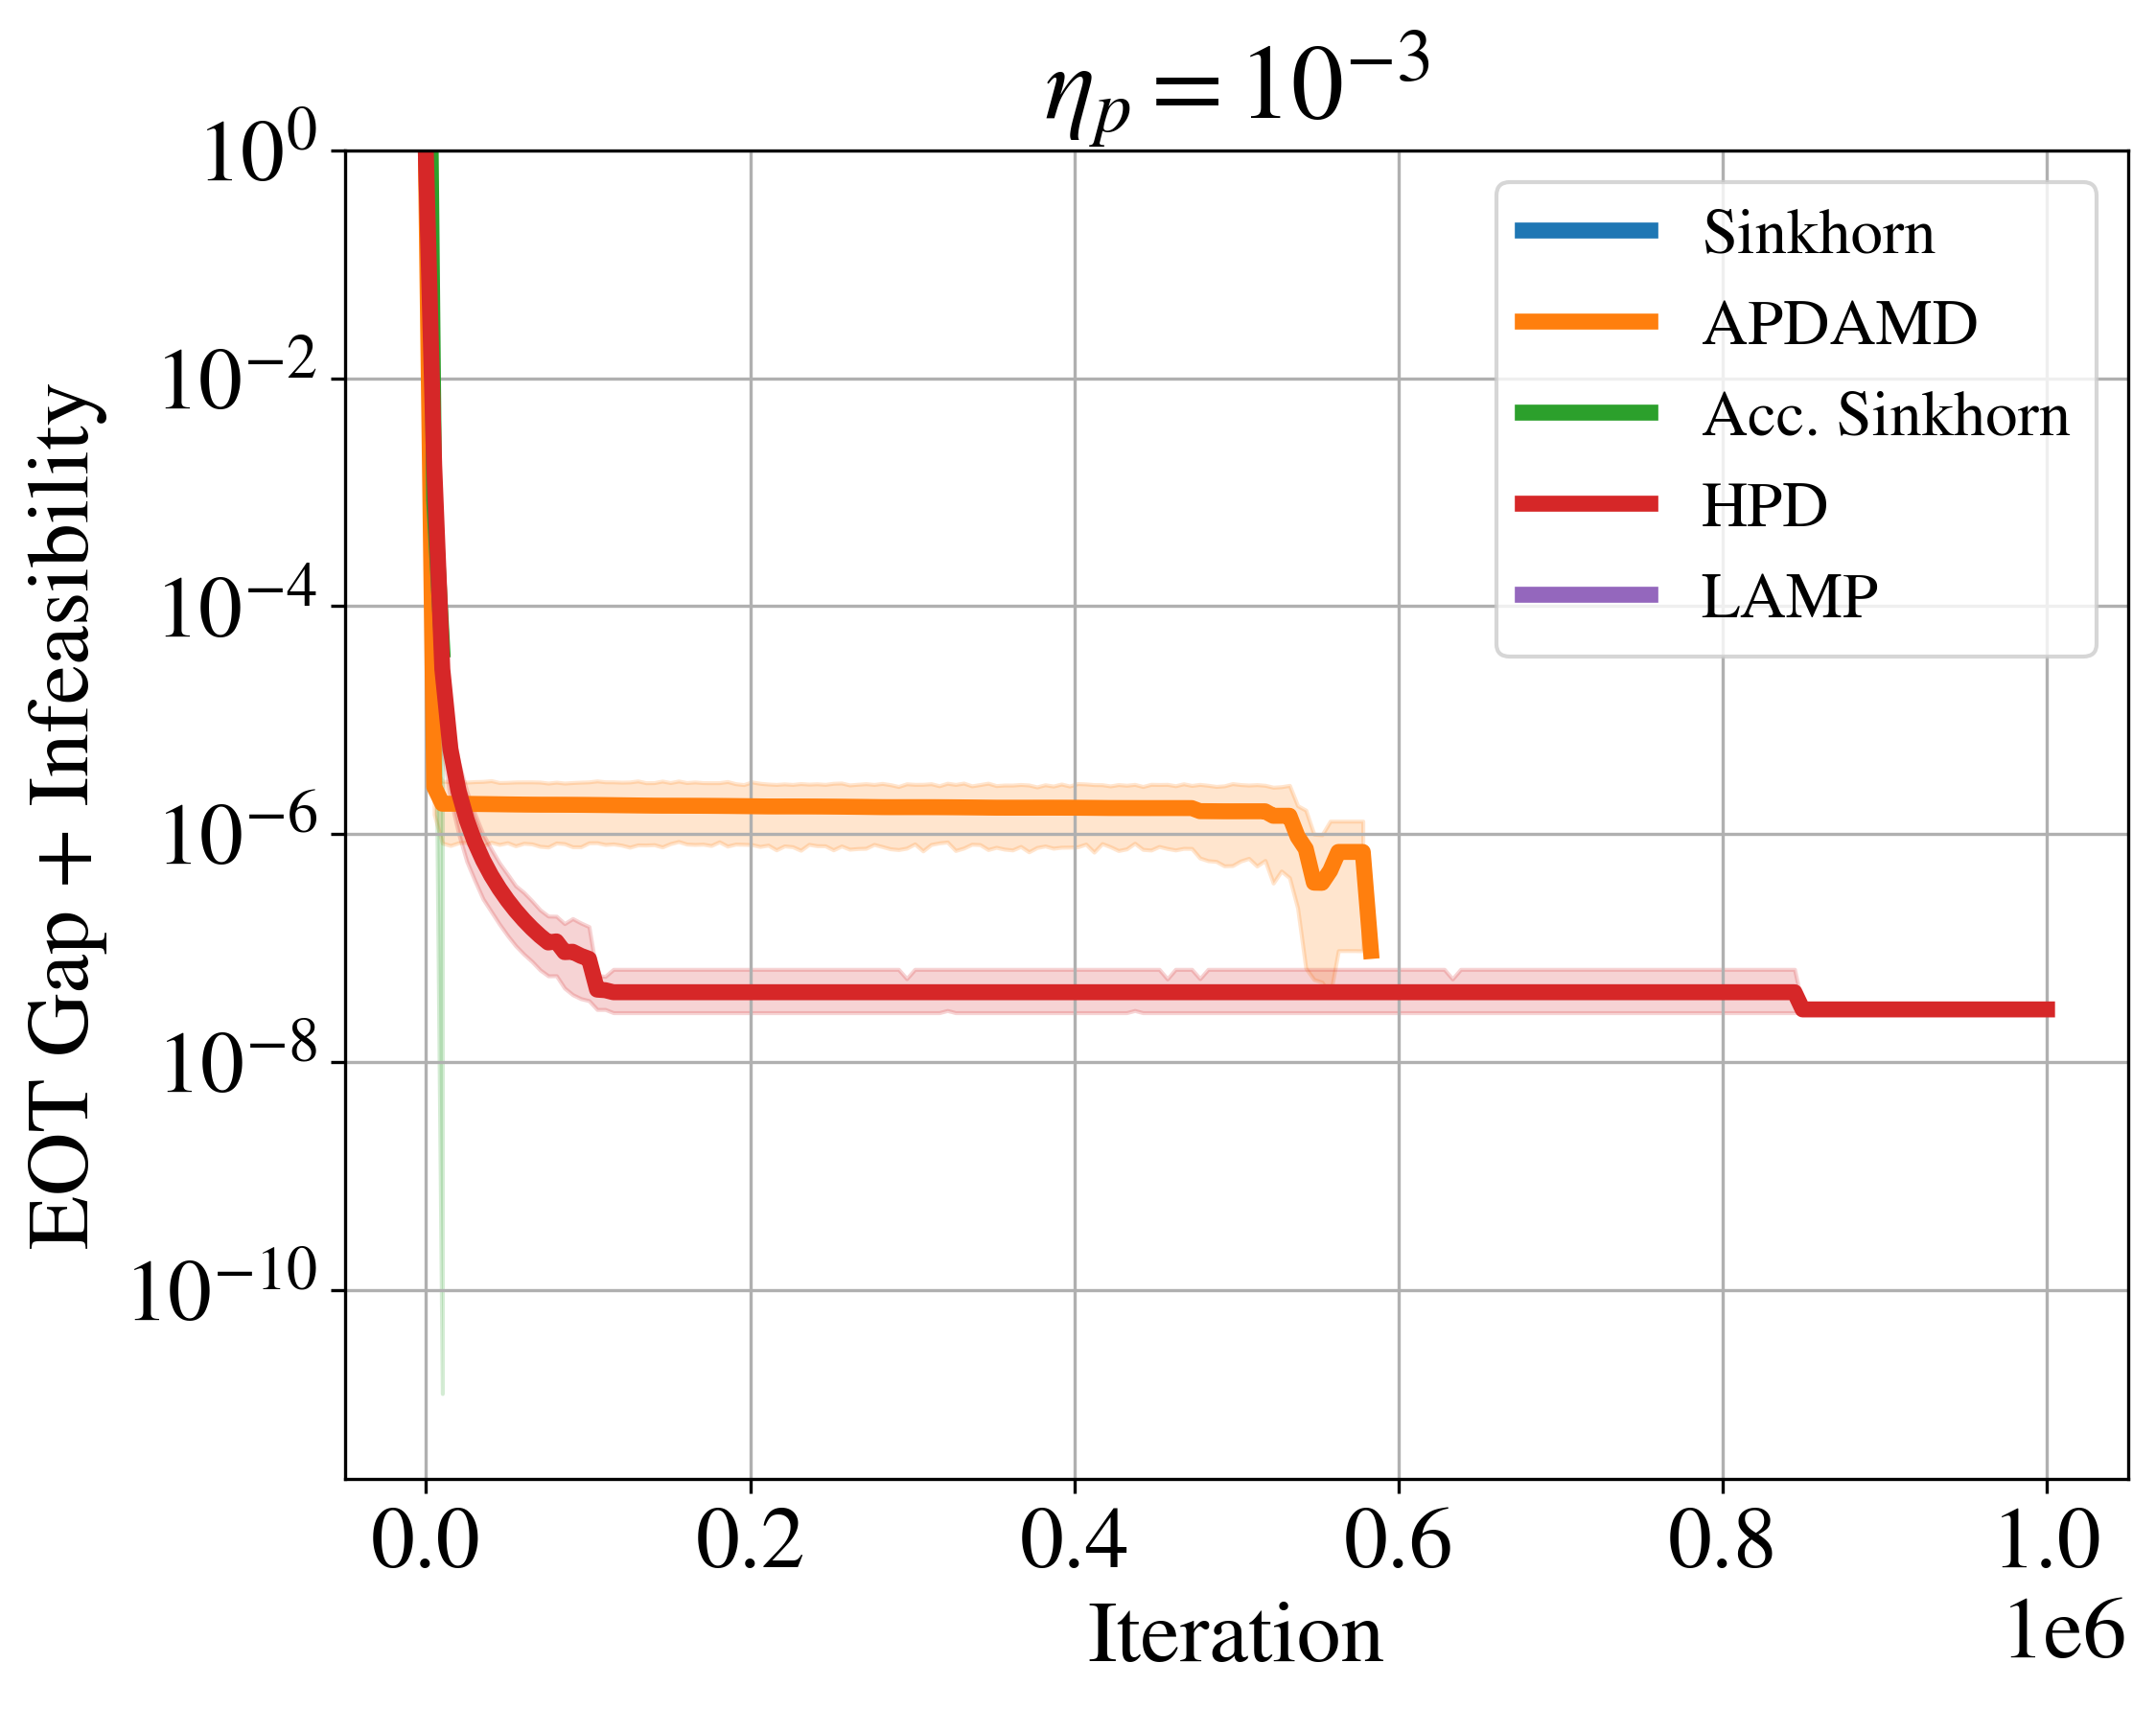

/tmp/ipykernel_1642000/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


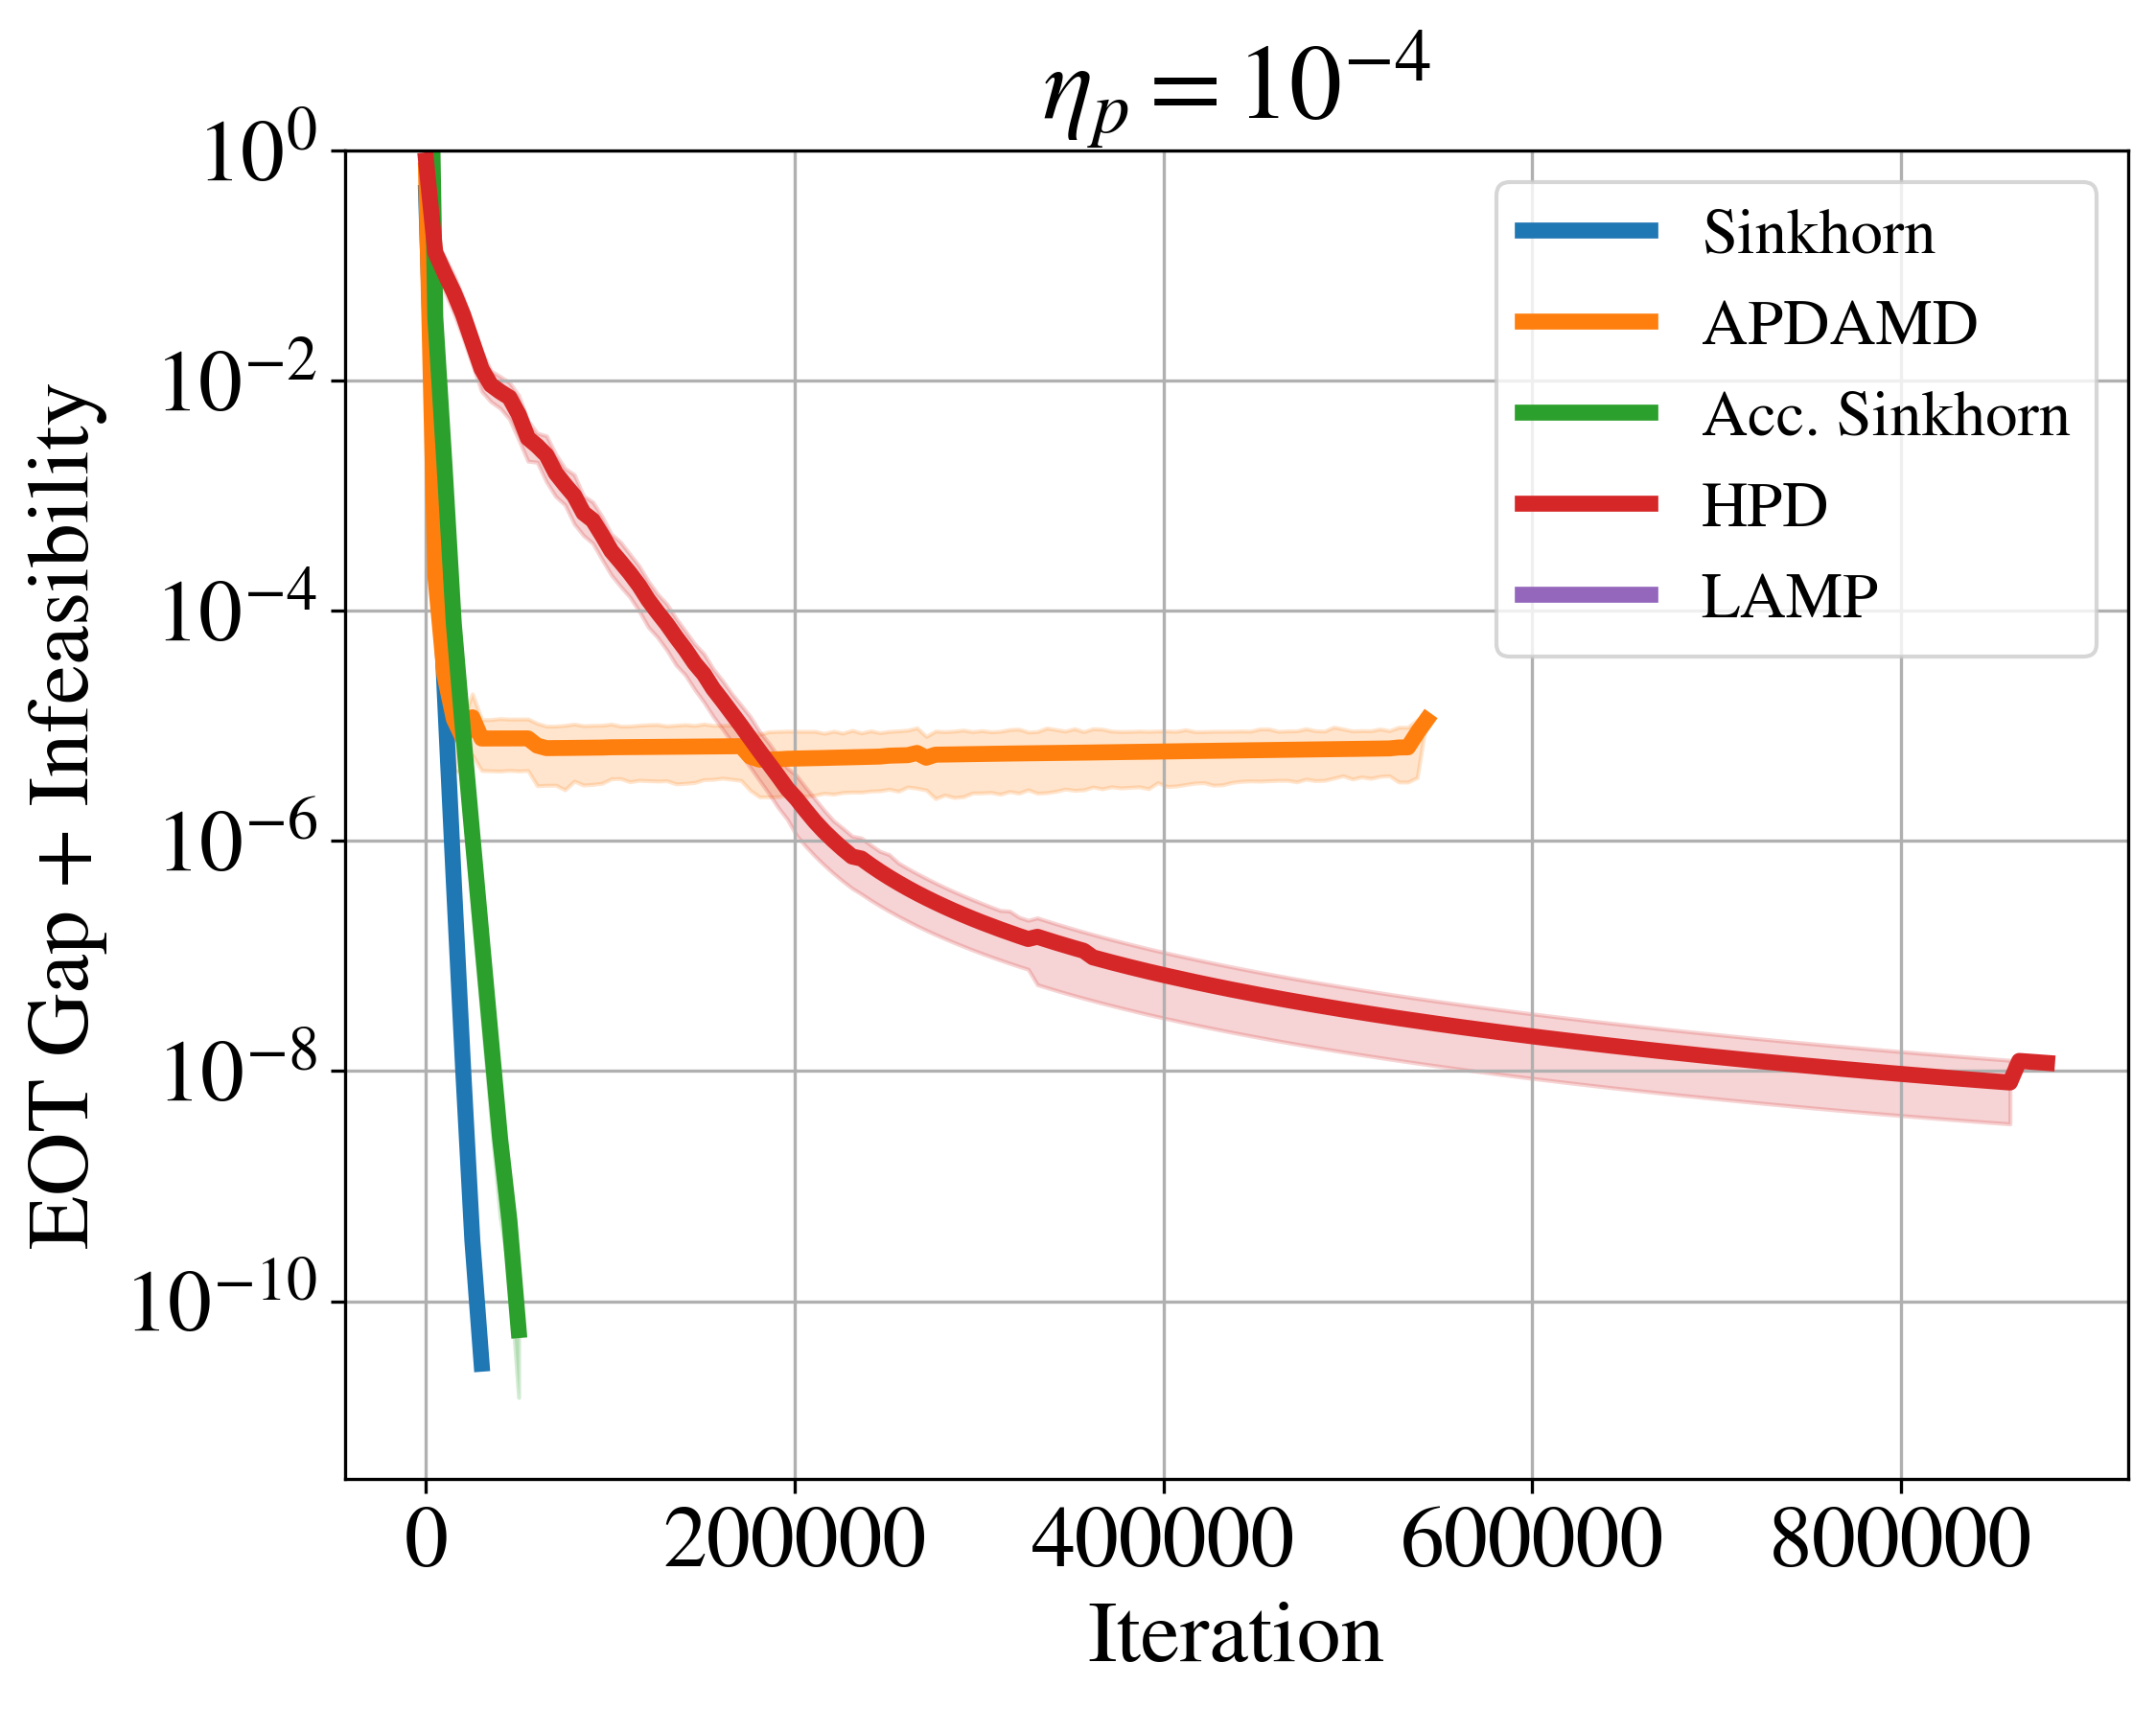

/tmp/ipykernel_1642000/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


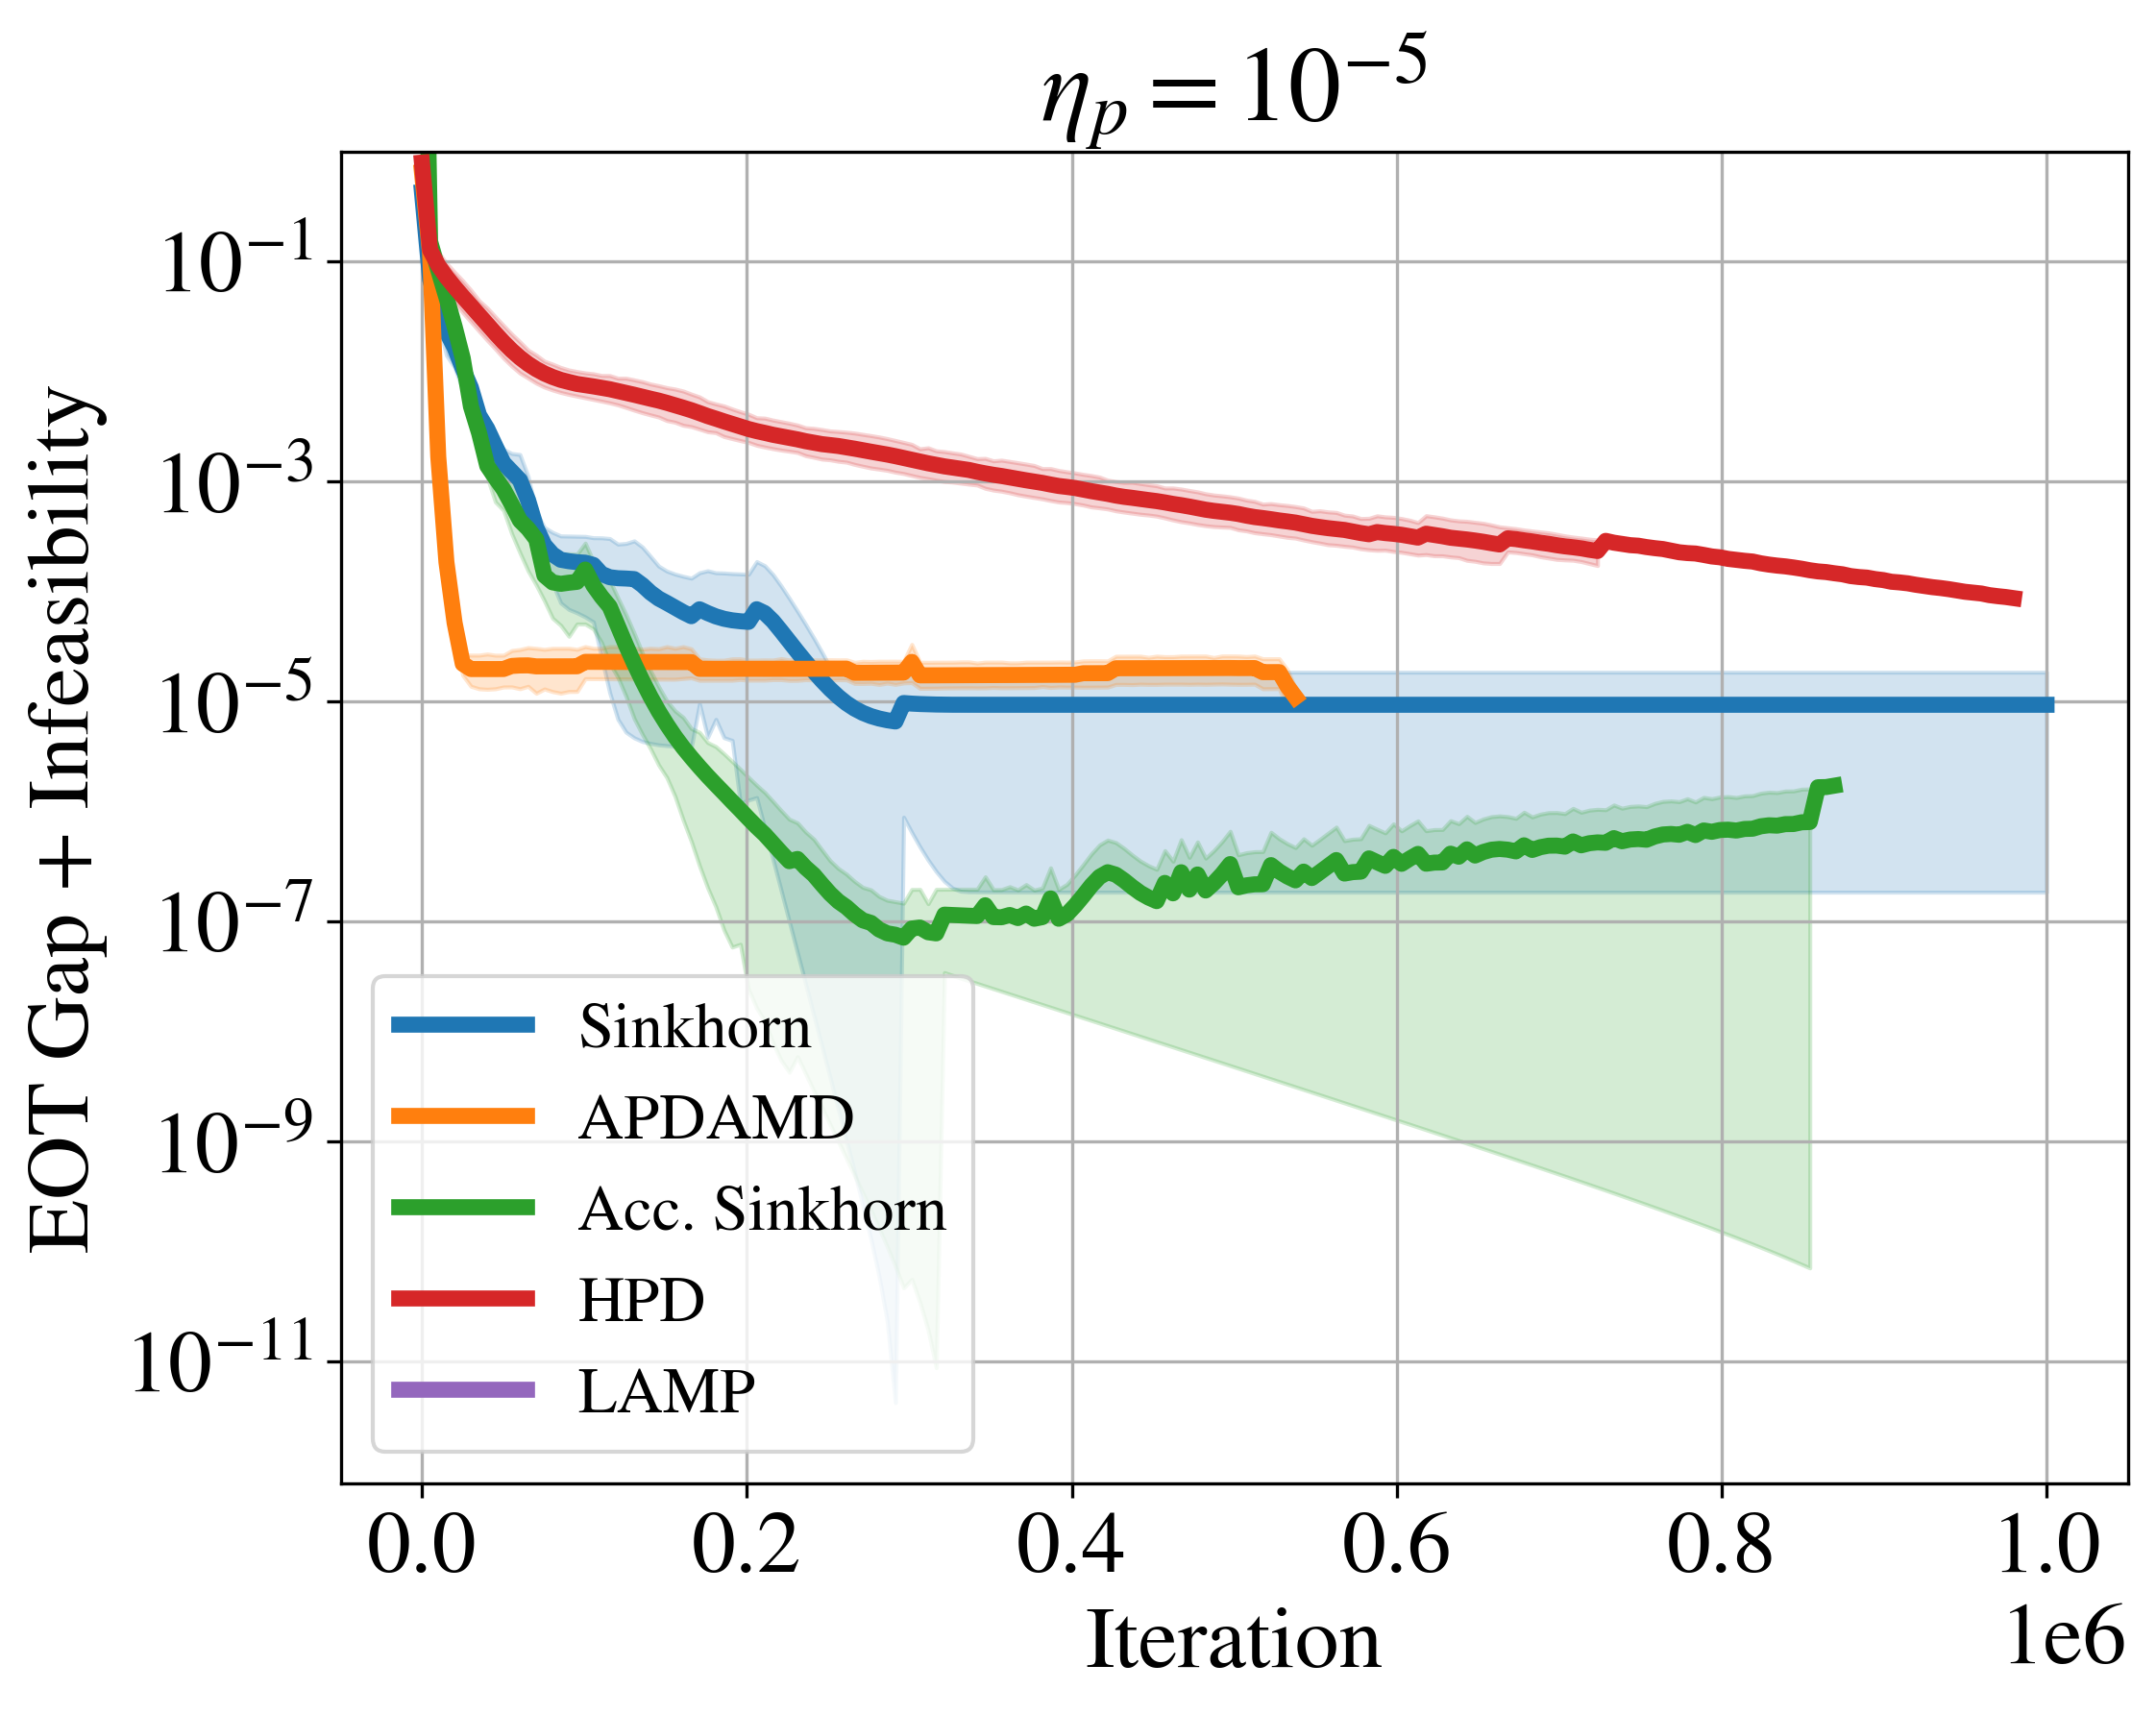

/tmp/ipykernel_1642000/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


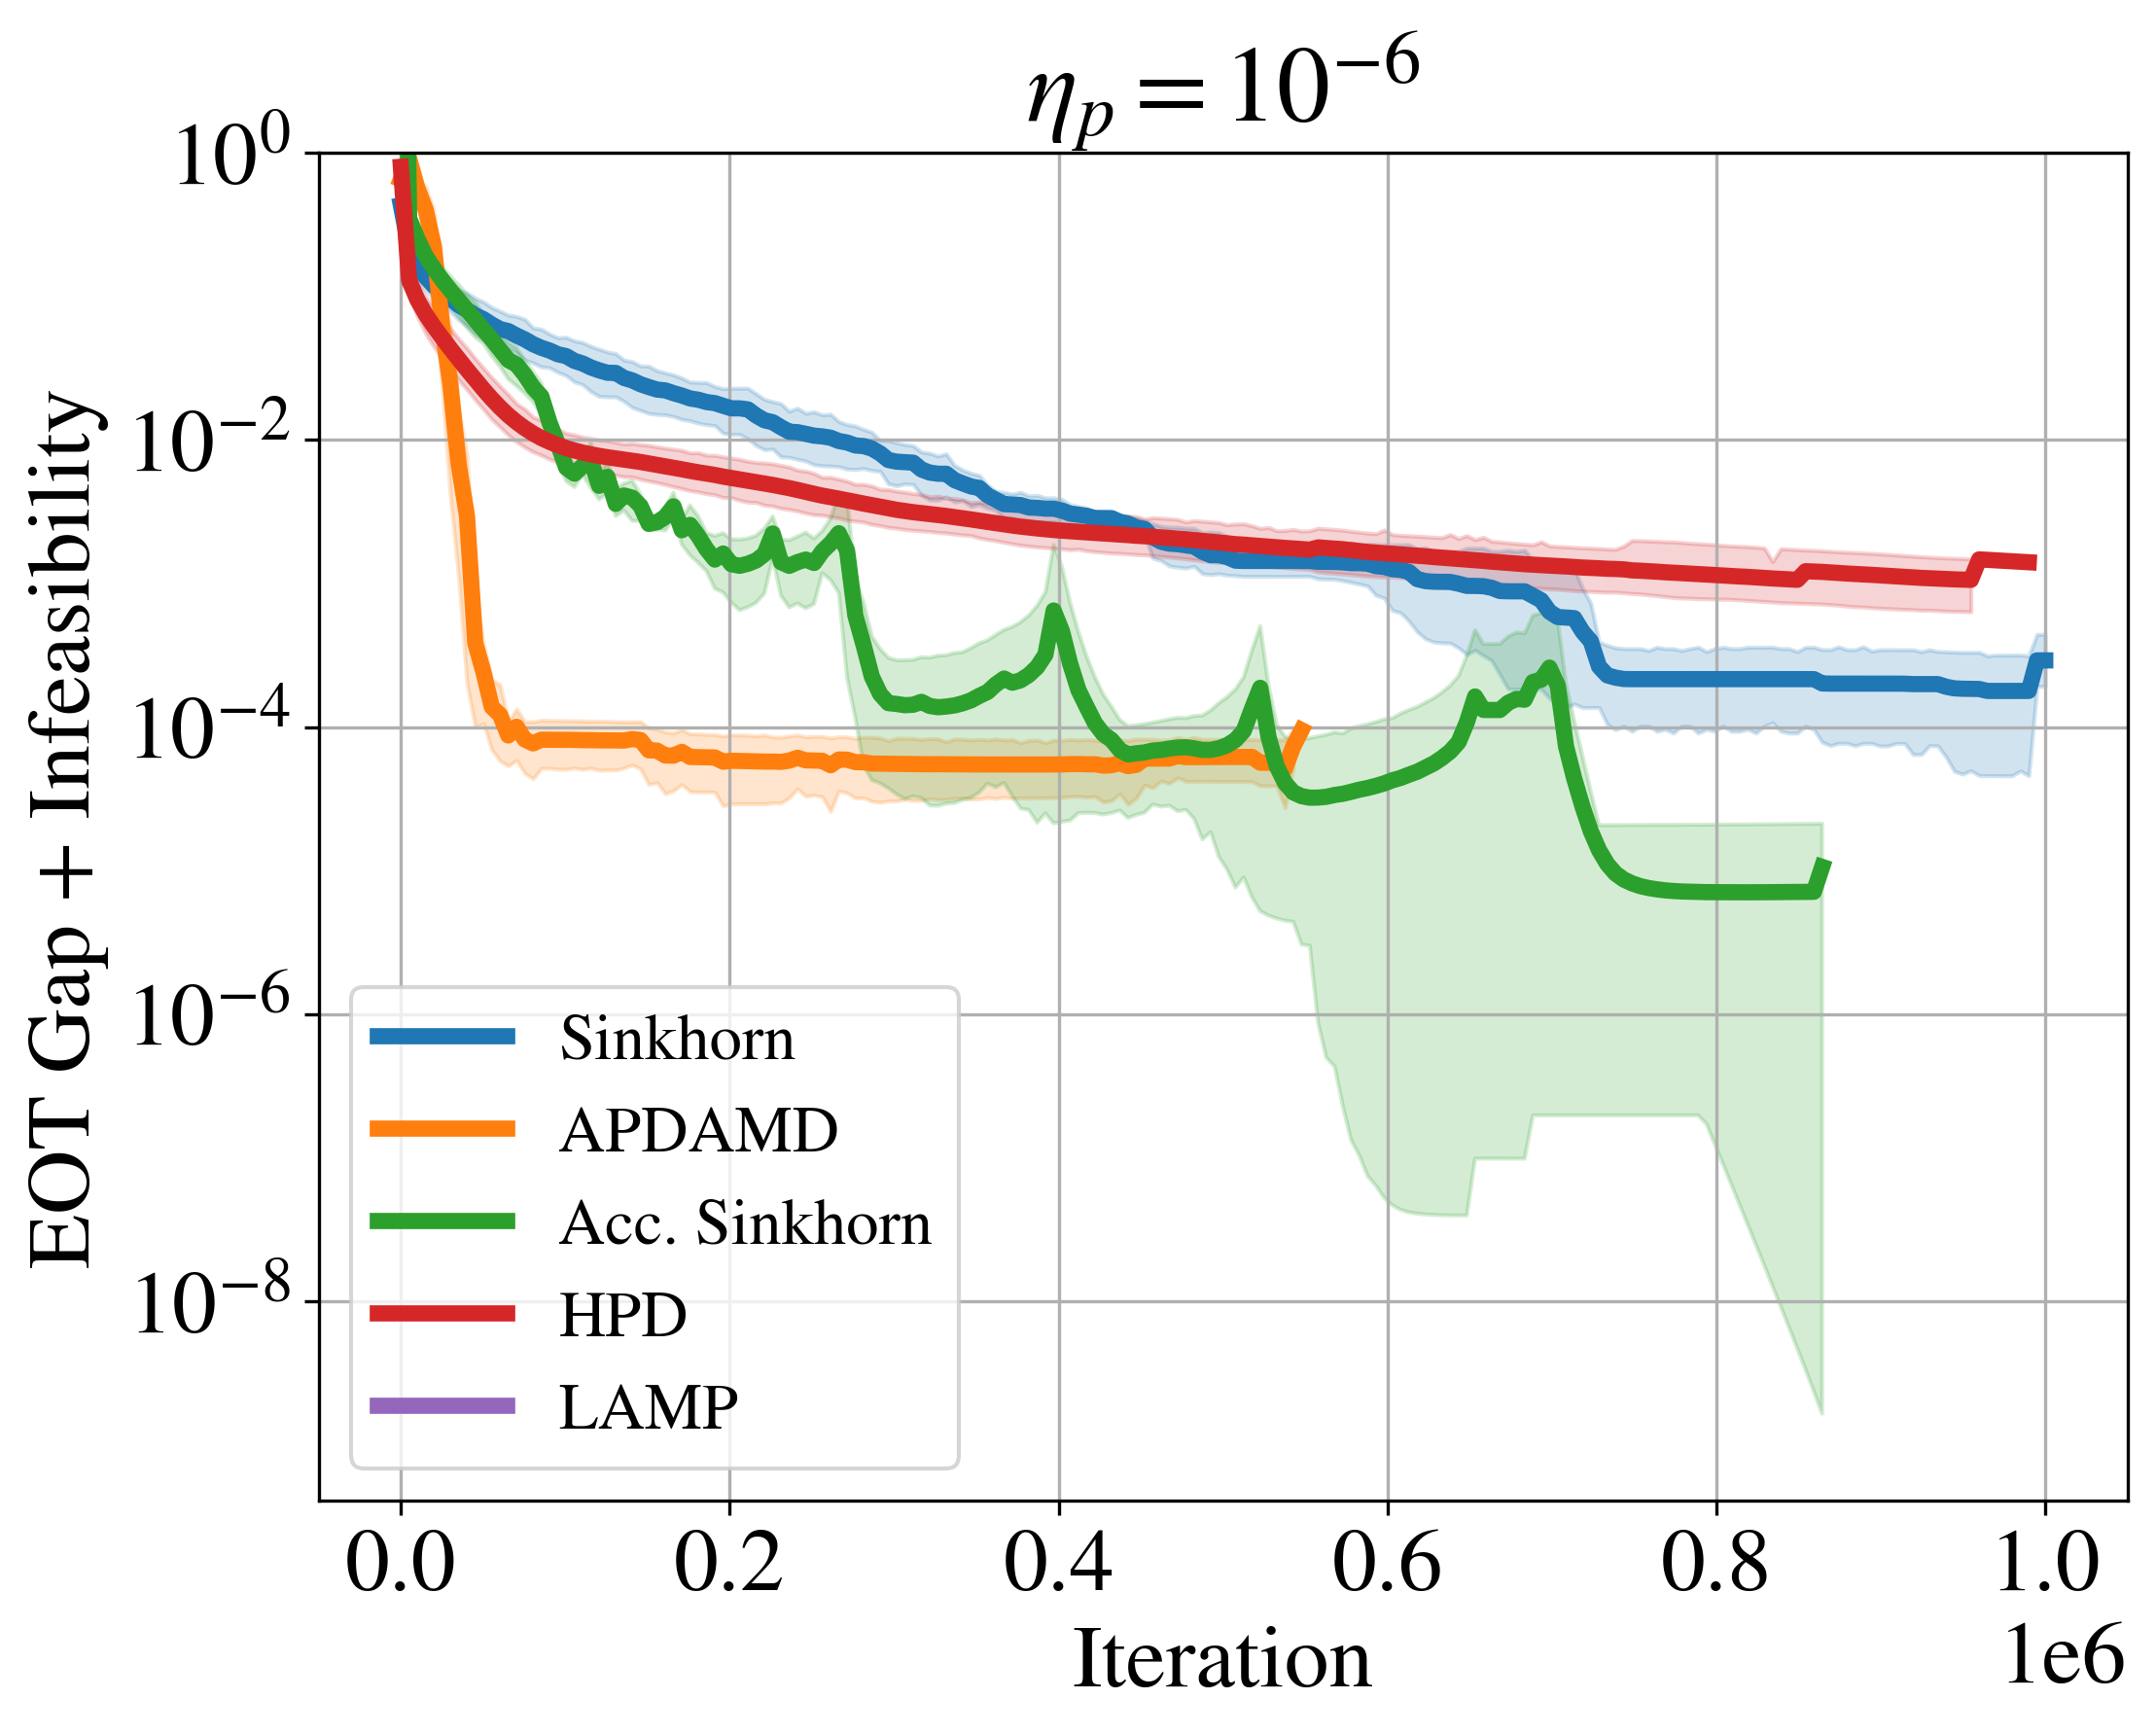

/tmp/ipykernel_1642000/3656514413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_df['solver'] = lim_df['solver'].replace({


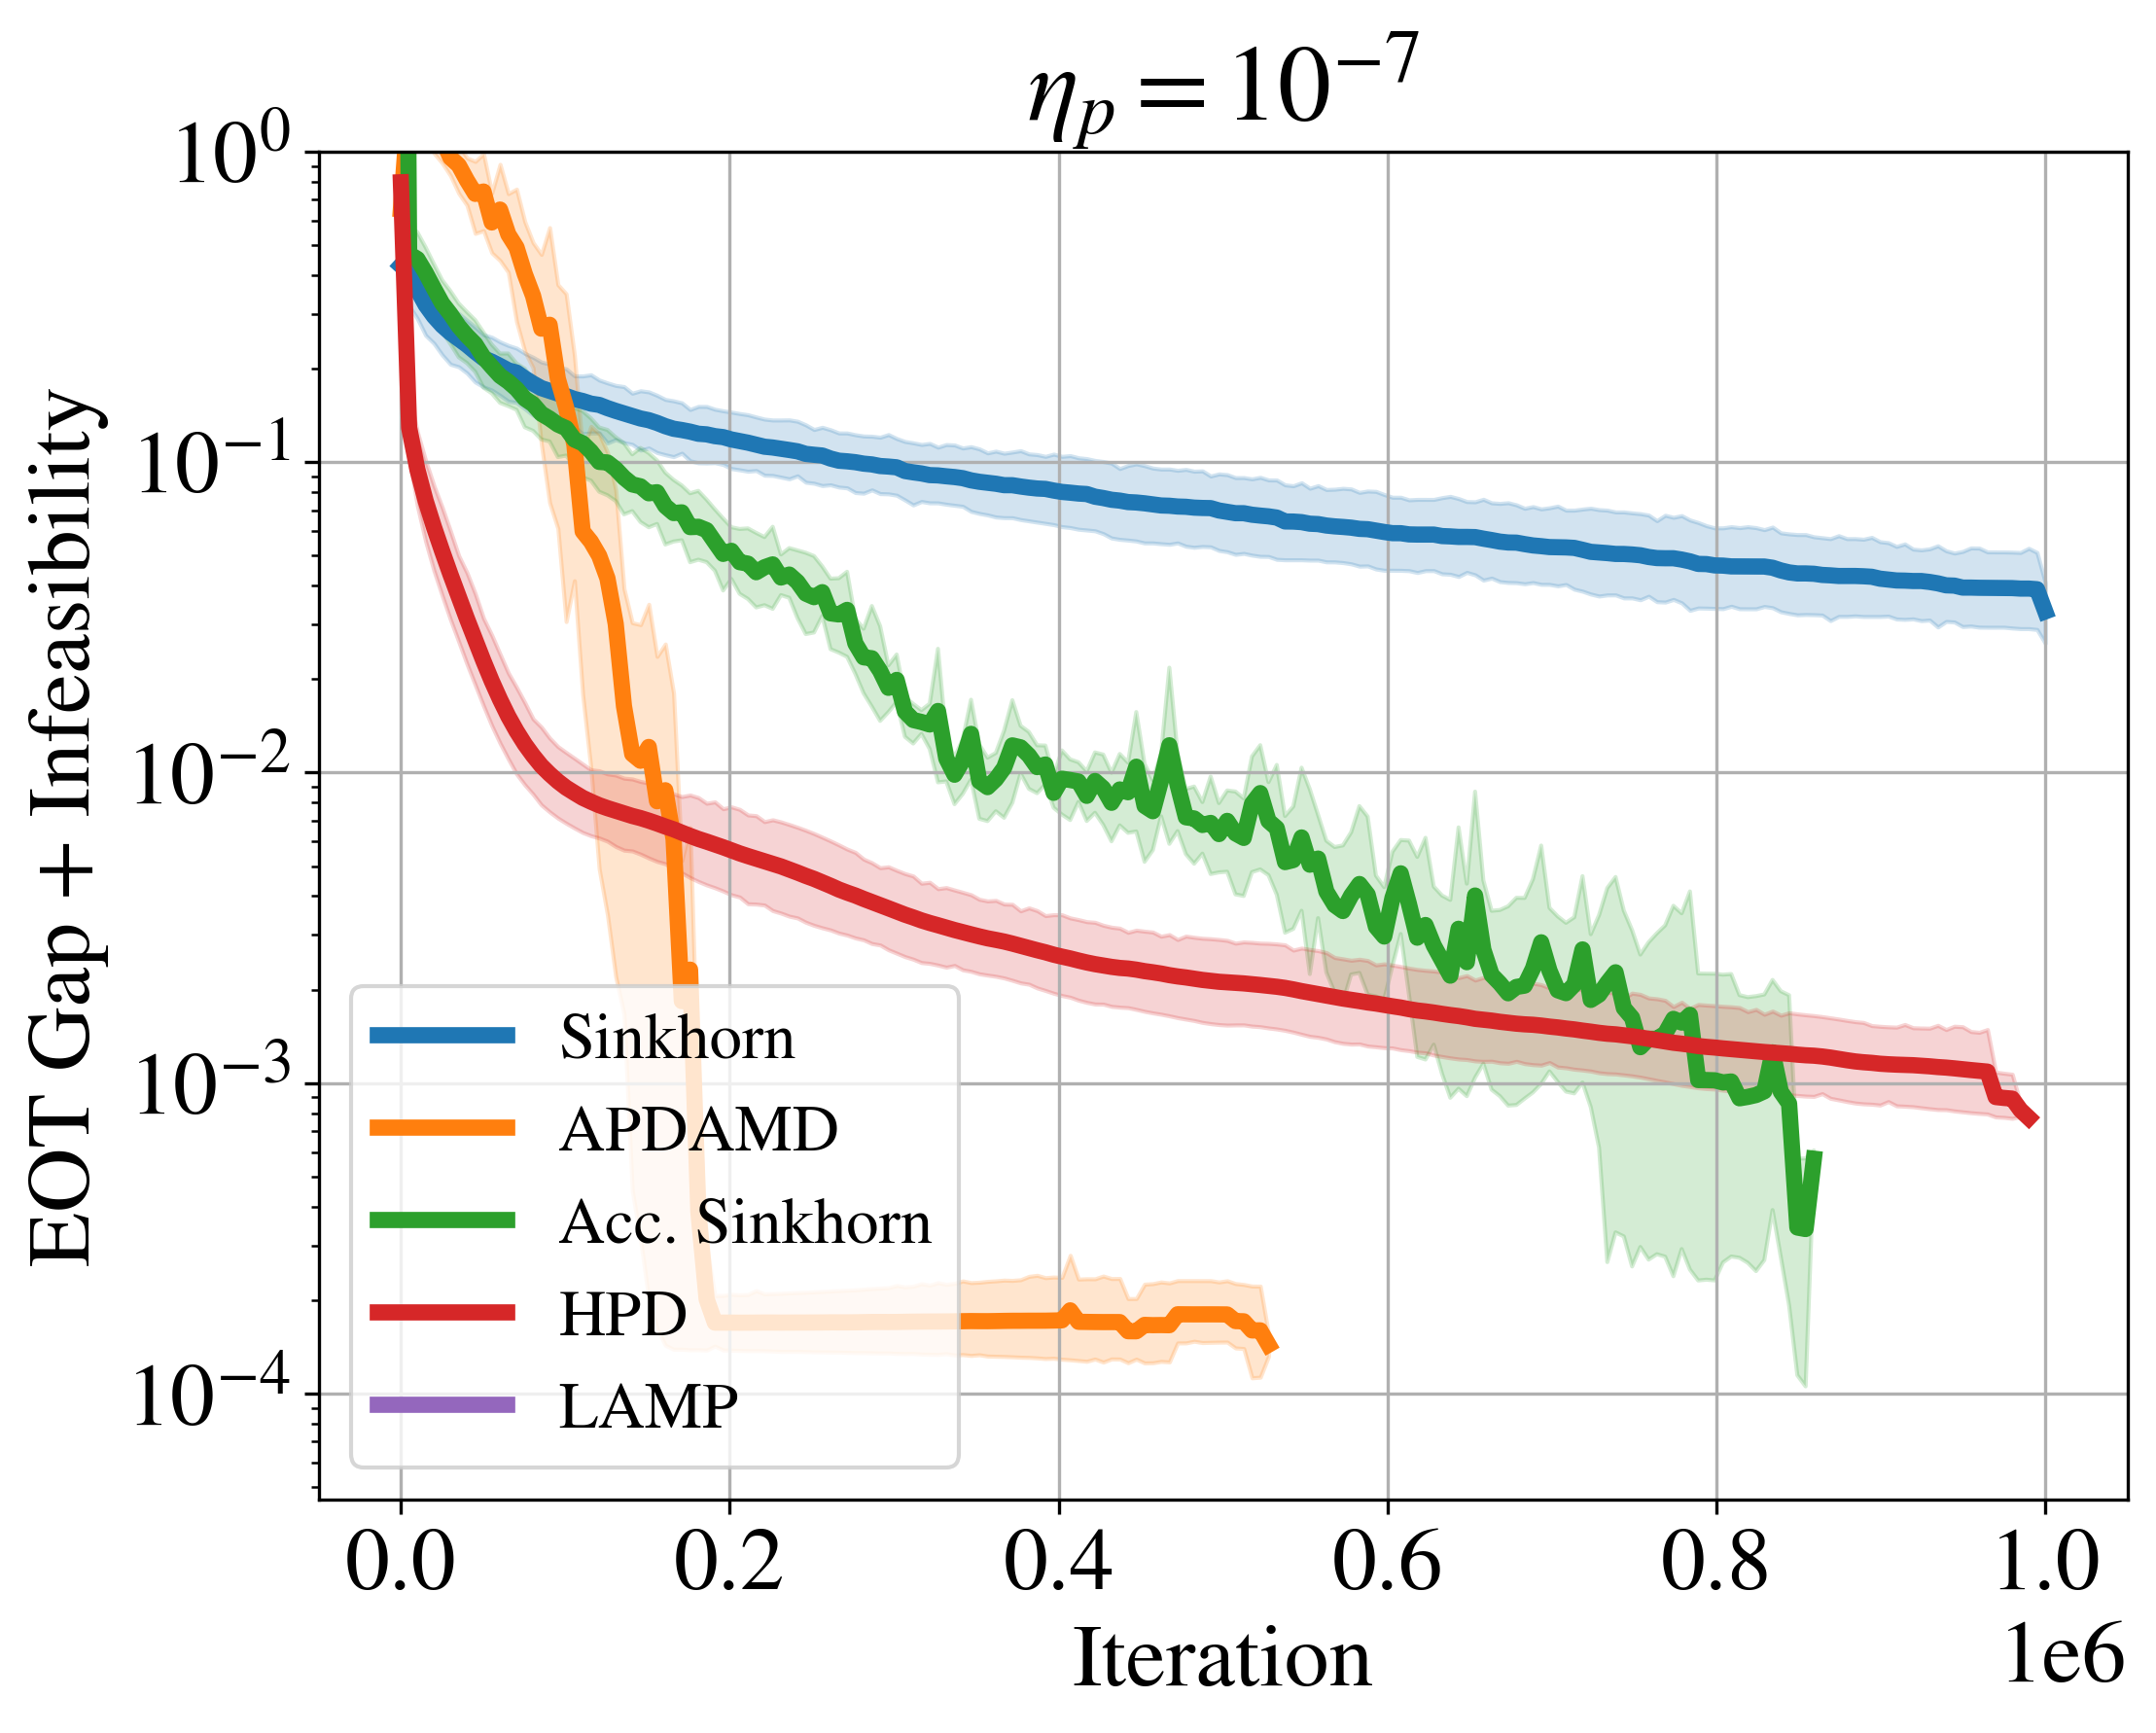

In [4]:
# probclass = 'classicimages'
df = pd.read_csv("../data_archive/fig_2_dotmark_comp.csv")
for eta in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]:
    fig, ax = plt.subplots(figsize=(8, 6))

    lim_df = df.query(f'eta == {eta}')
    lim_df['solver'] = lim_df['solver'].replace({
        'apdamd': "APDAMD",
        'sinkhorn': "Sinkhorn",
        'dual_extragradient': "LAMP",
        'hpd': "HPD",
        'accelerated_sinkhorn': "Acc. Sinkhorn"
    })

    hue_order = [
        "Sinkhorn",
        "APDAMD",
        "Acc. Sinkhorn",
        "HPD",
        "LAMP"
    ]
    ax=sns.lineplot(lim_df, ax=ax, x='iter', y='objective_gap', hue='solver', hue_order=hue_order, linewidth=4)
    ax.set_yscale('log')
    # ax.set_xscale(10000)
    ax.set_ylim((ax.get_ylim()[0], 1))
    # ax.set_xlim((ax.get_xlim()[0], 10000))
    ax.legend(fontsize=16)
    ax.grid()
    ax.set_ylabel('EOT Gap + Infeasibility')
    ax.set_xlabel('Iteration')
    ax.set_title('$\\eta_p=10^{%d}$' % (round(np.log10(eta))))
    plt.show()
    fig.savefig(f'../figures/broad_dotmark_1en{eta}_lamp.pdf', bbox_inches='tight')


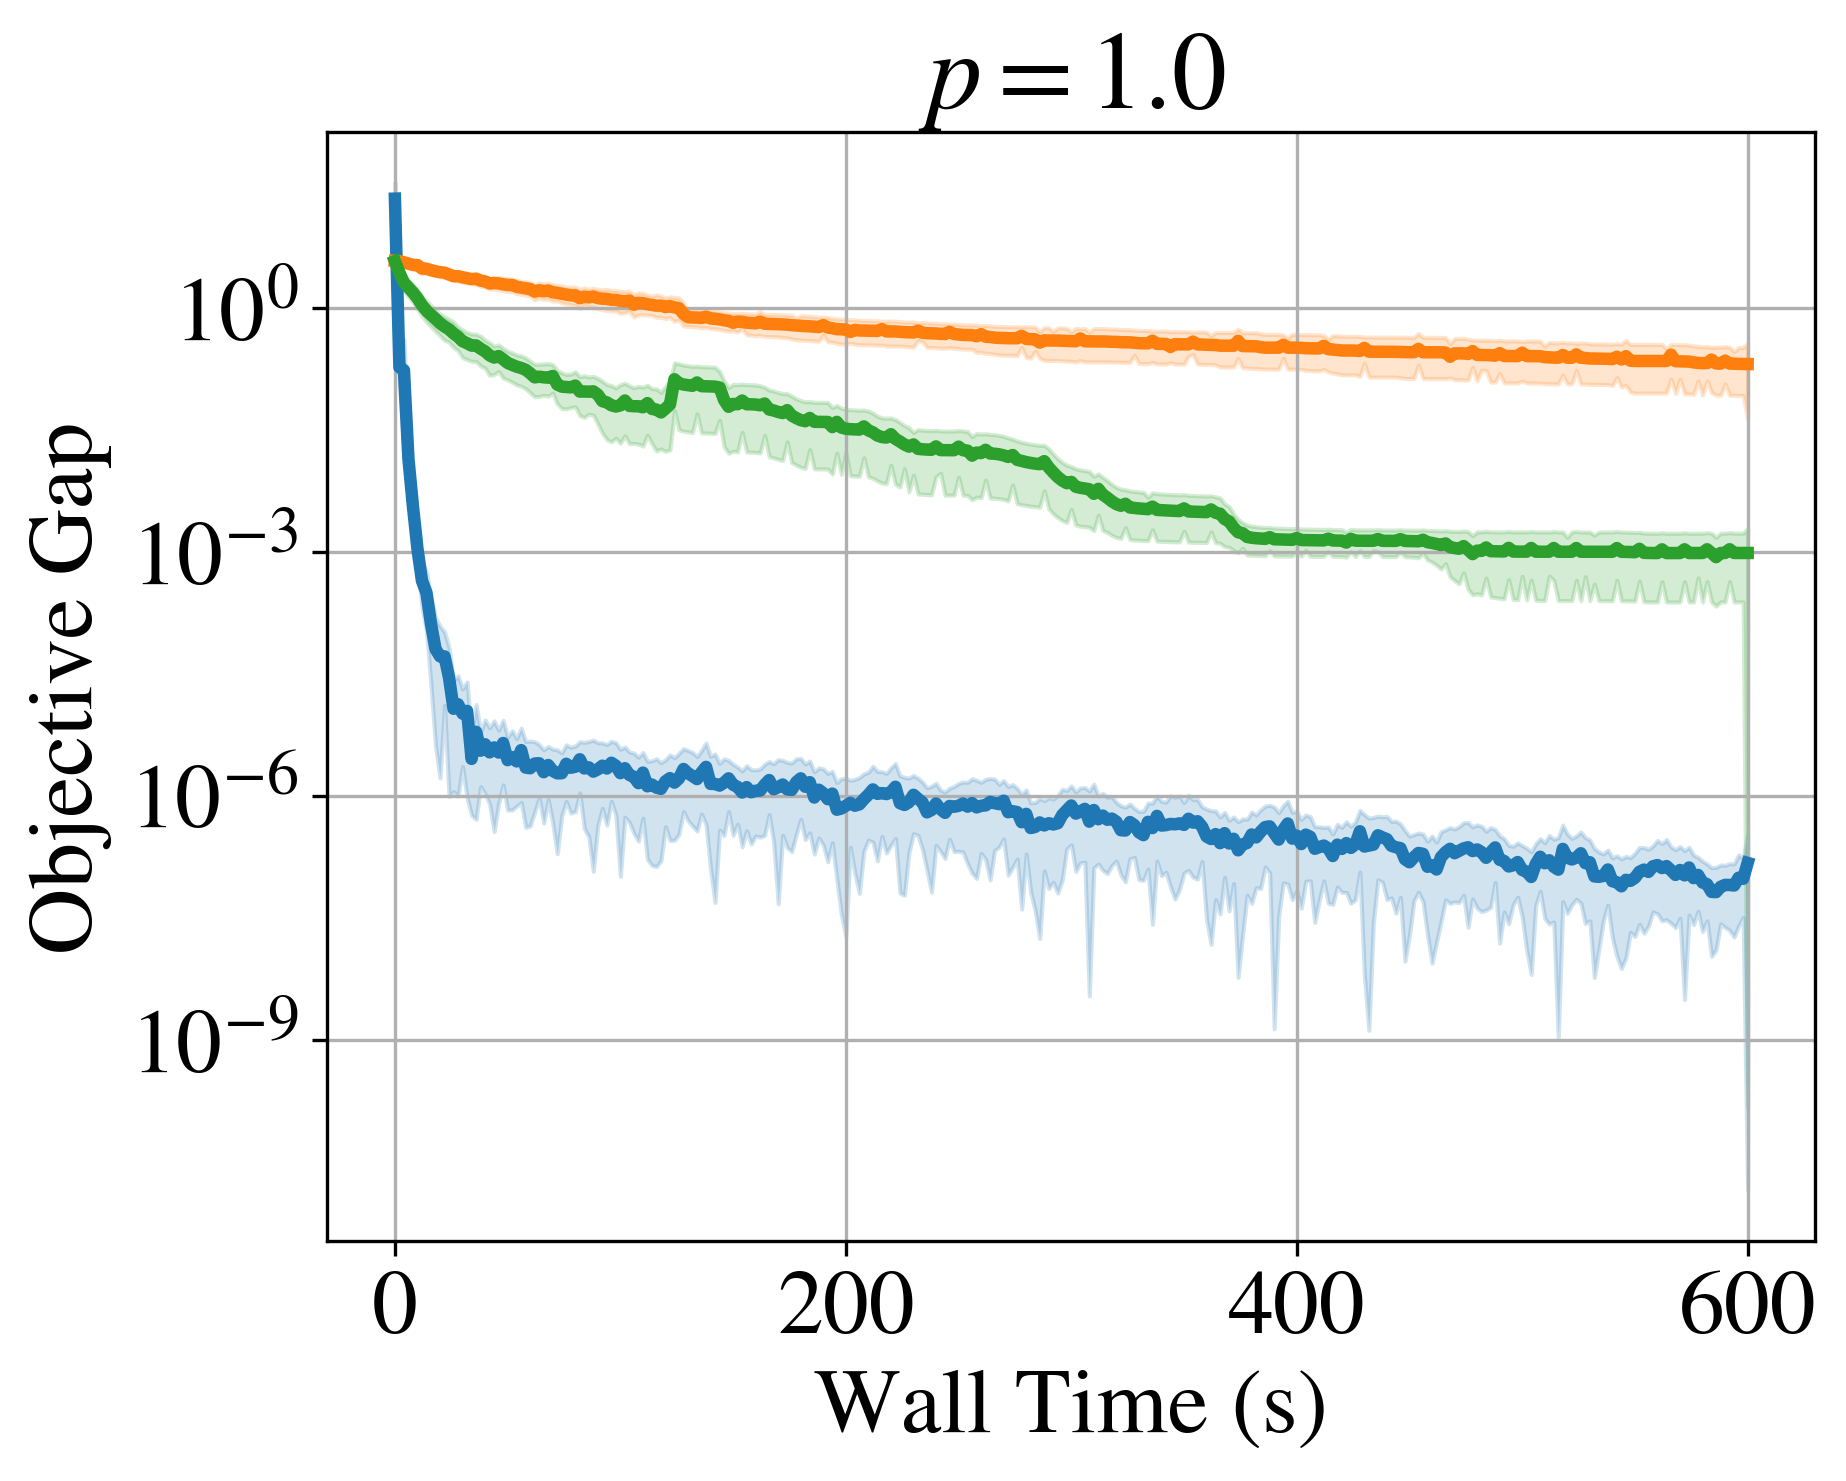

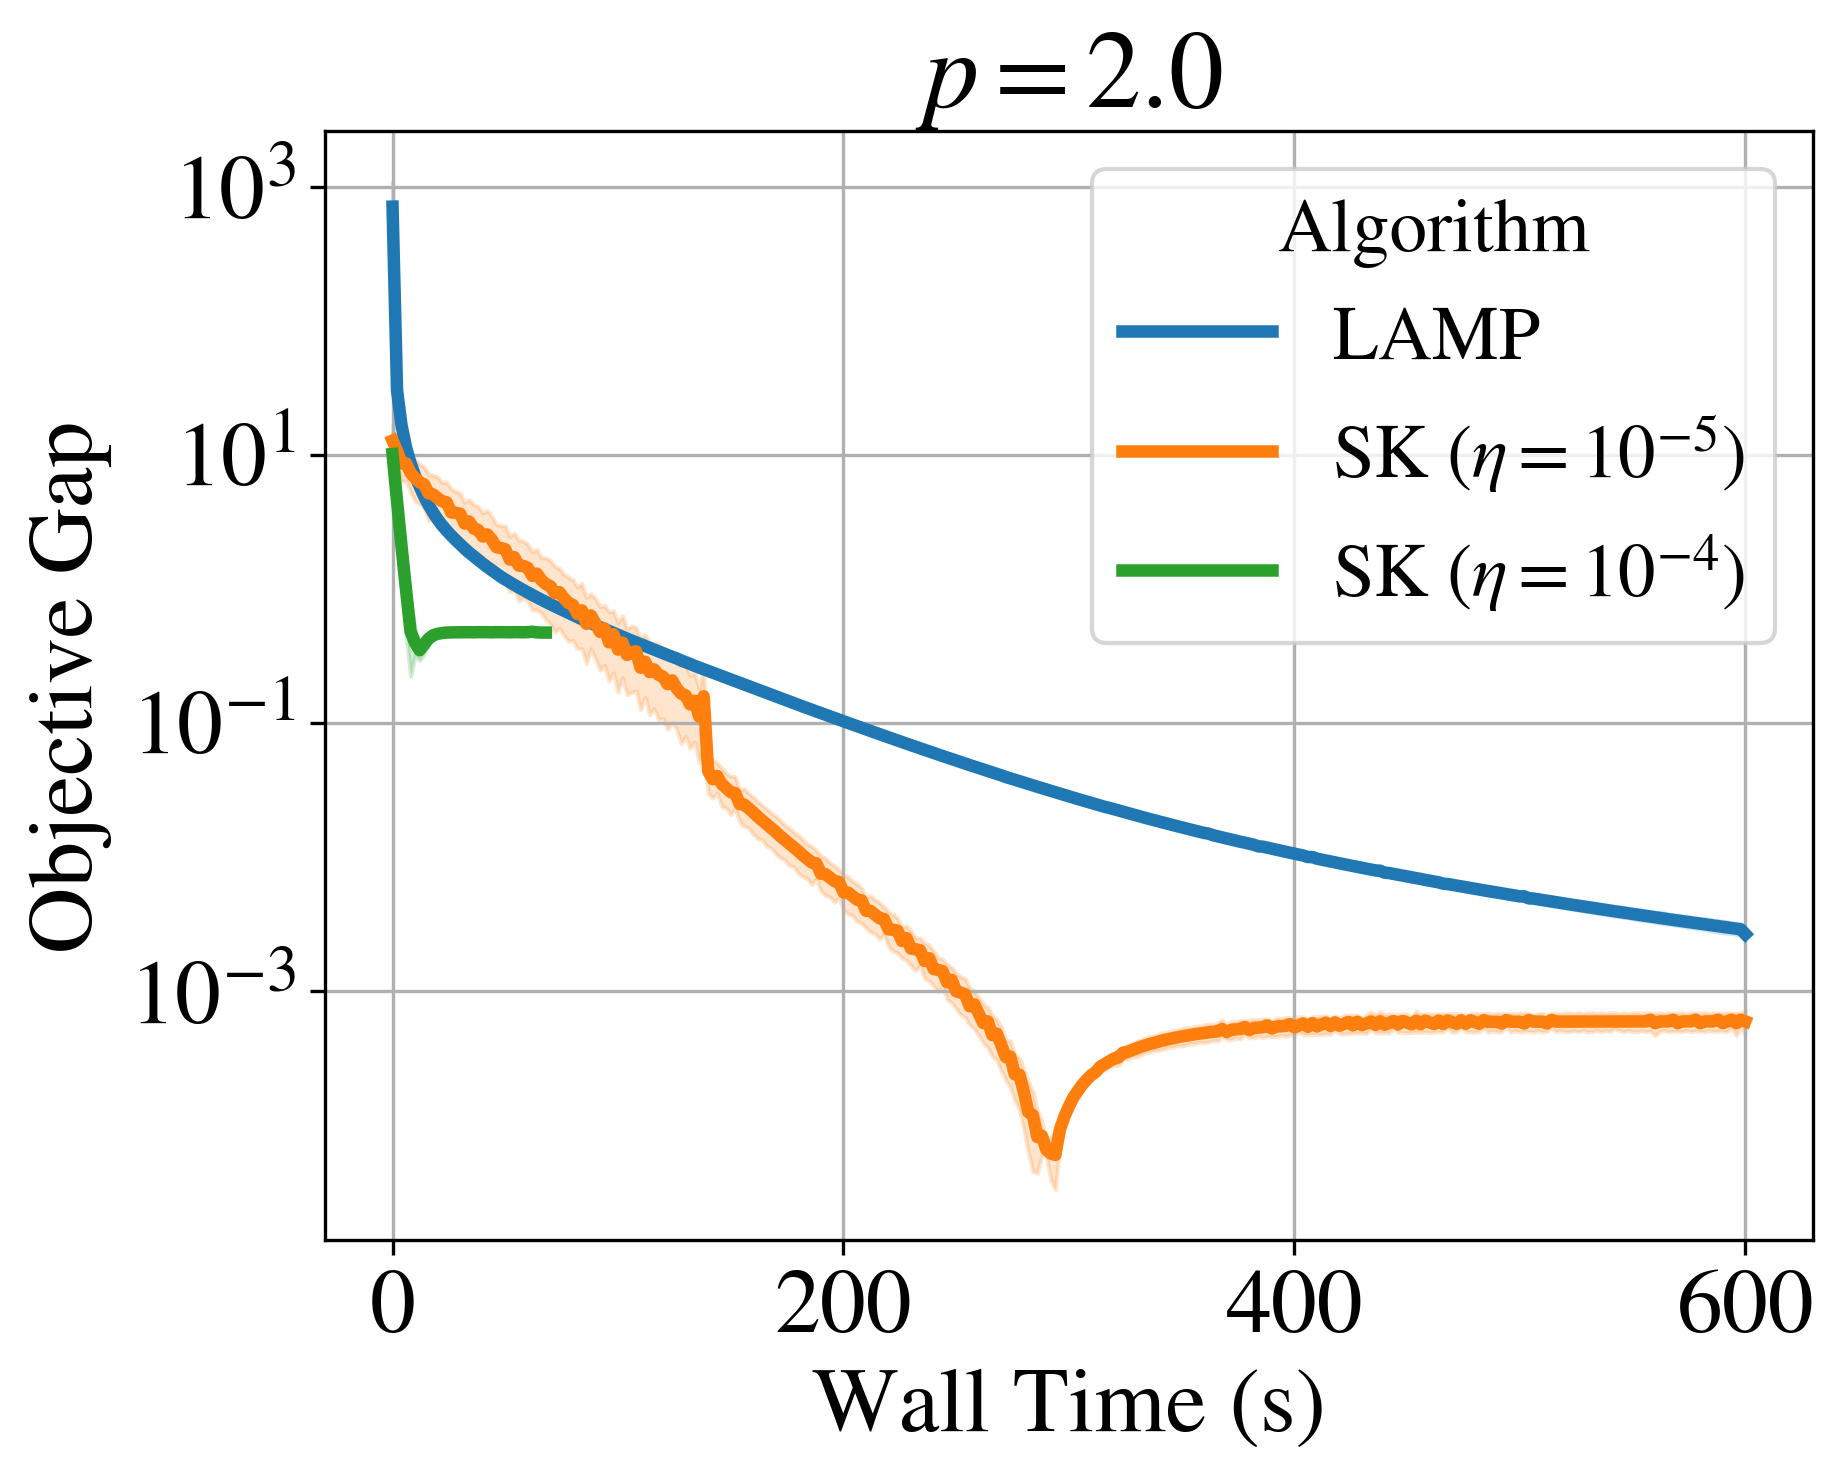

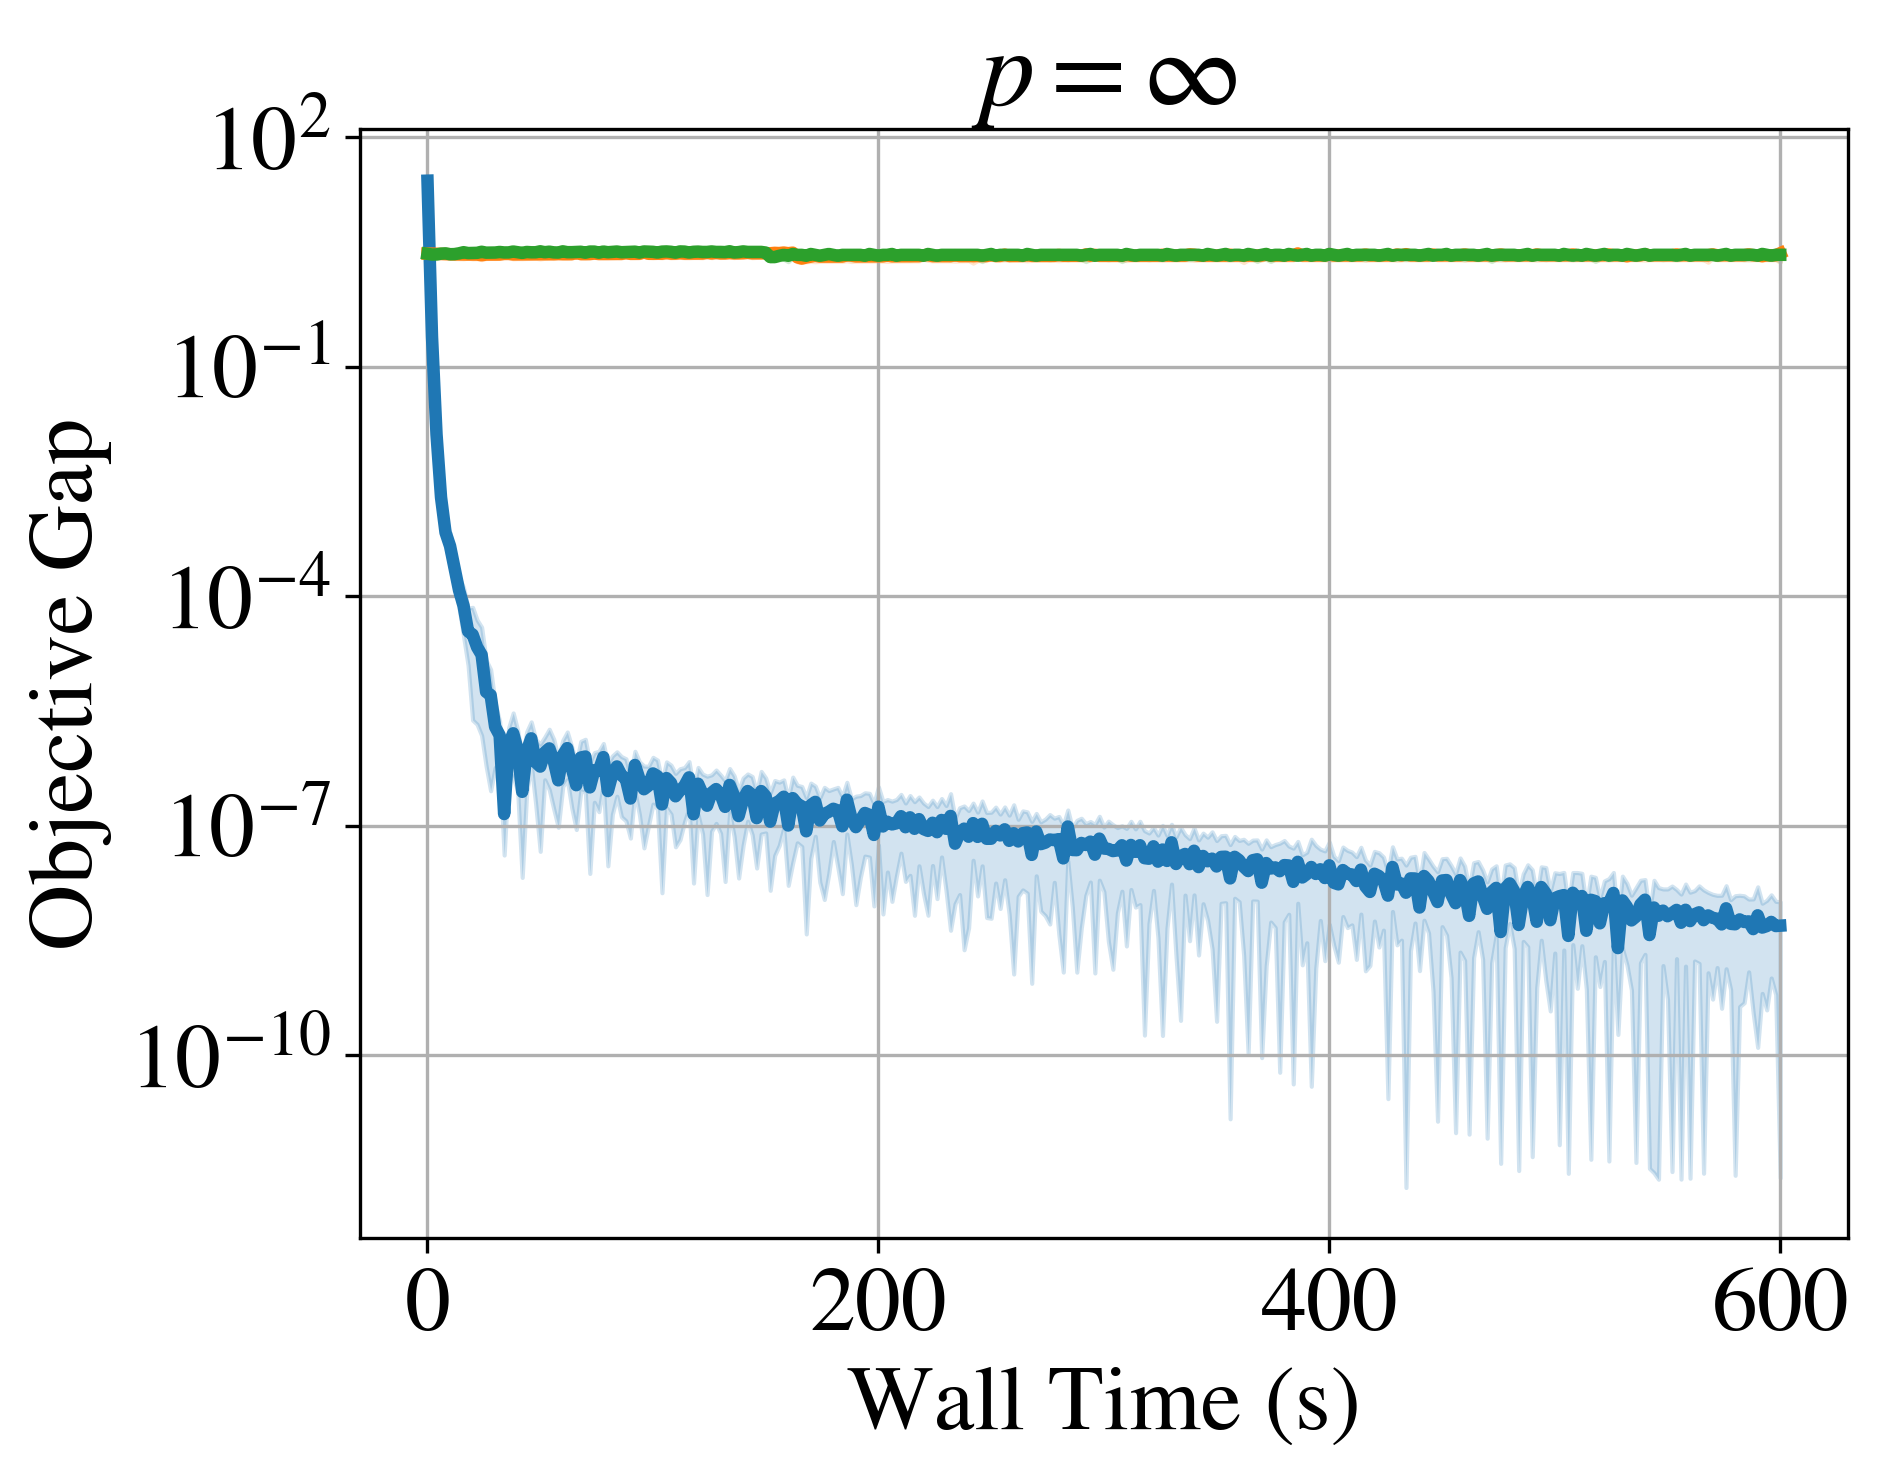

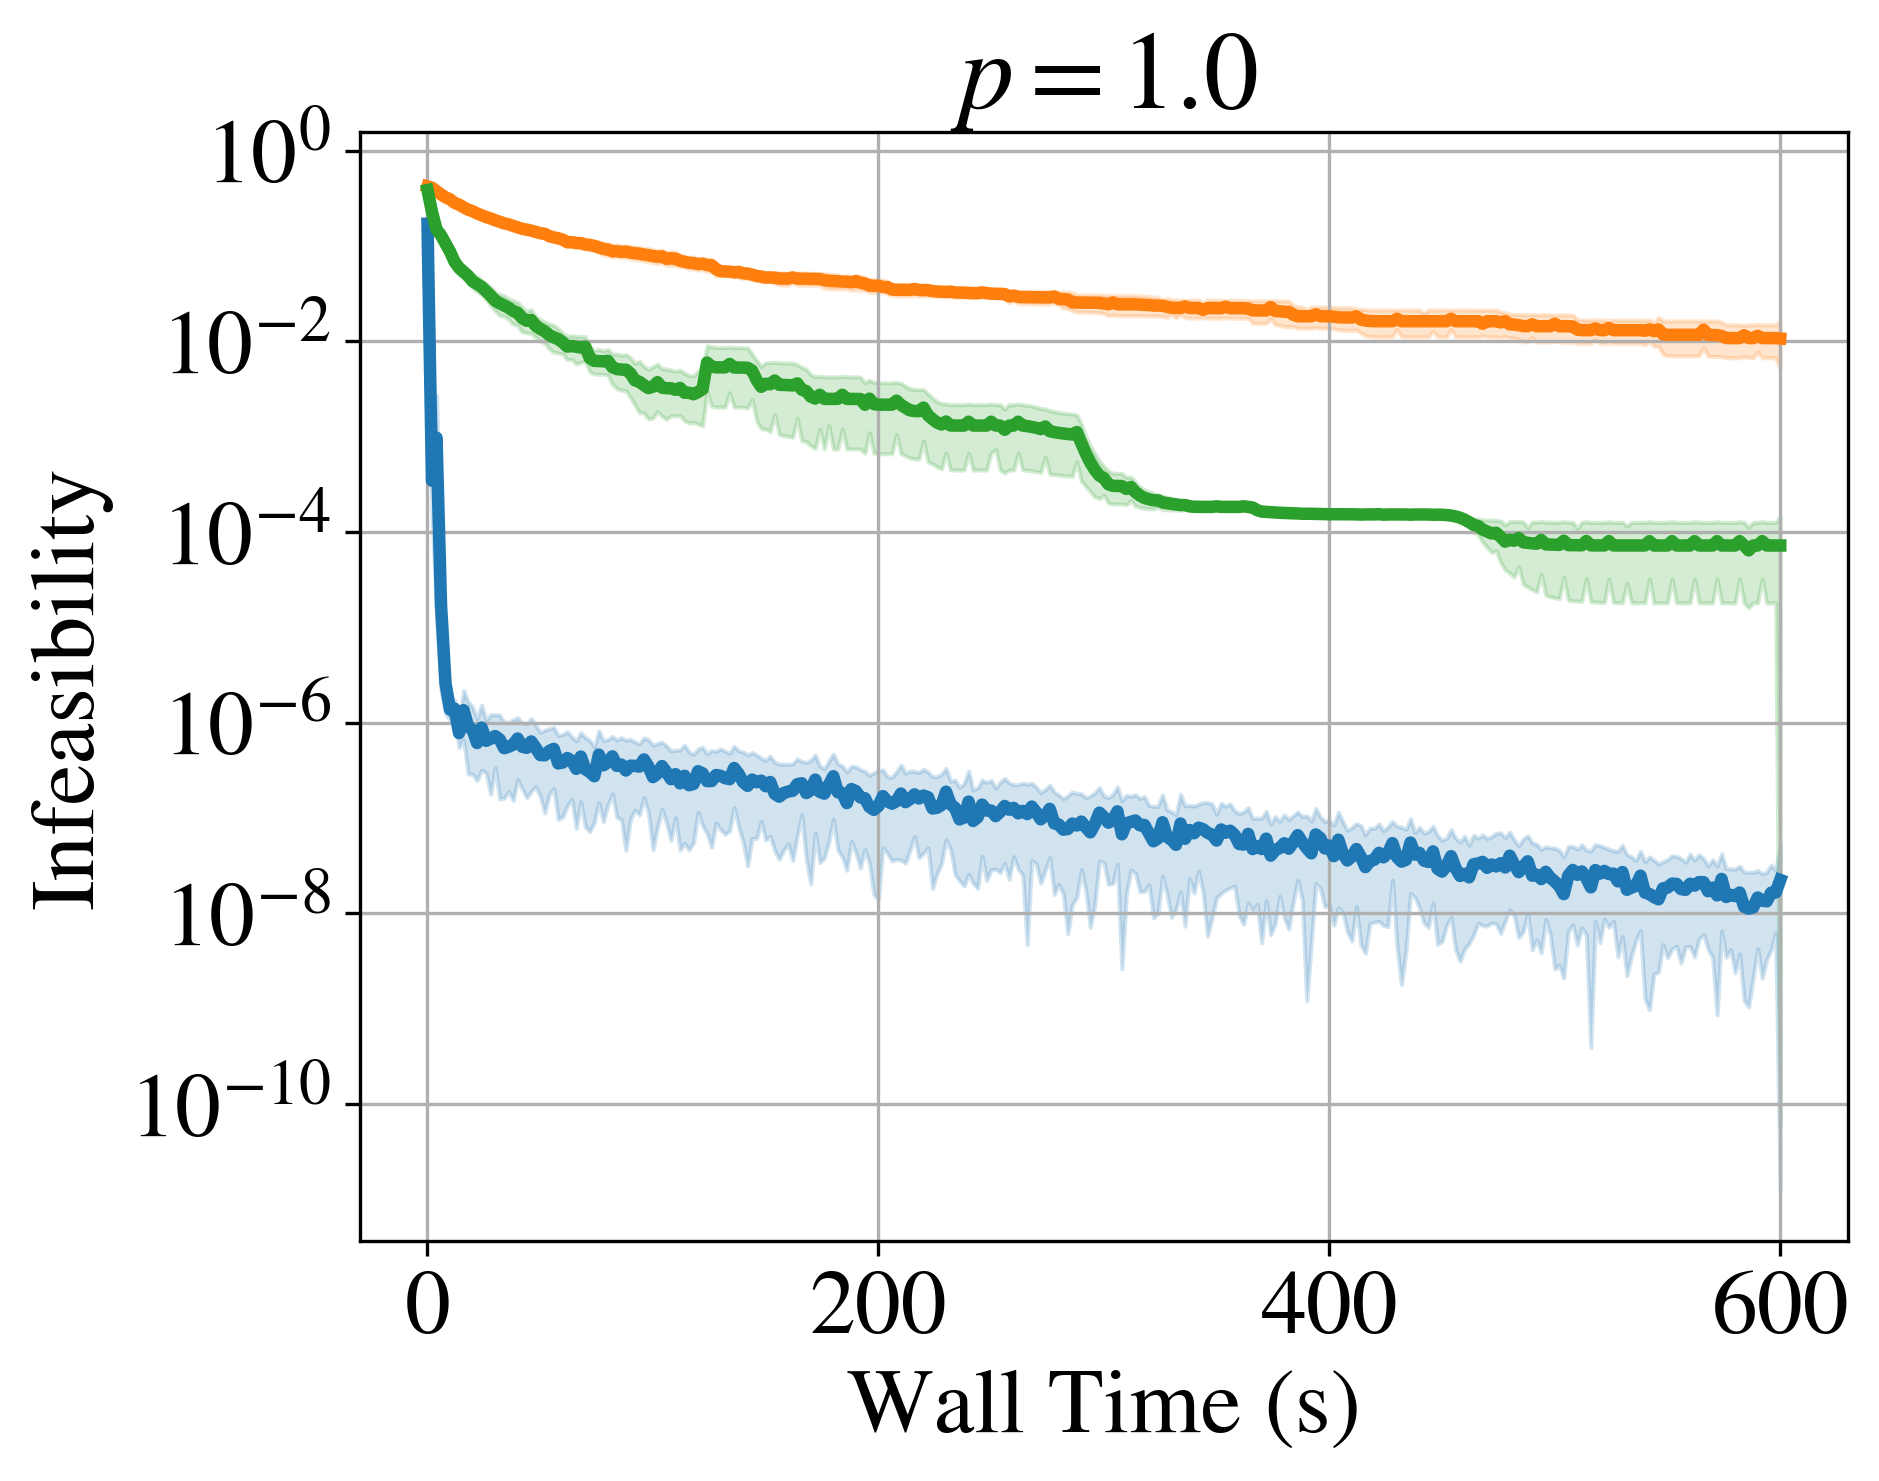

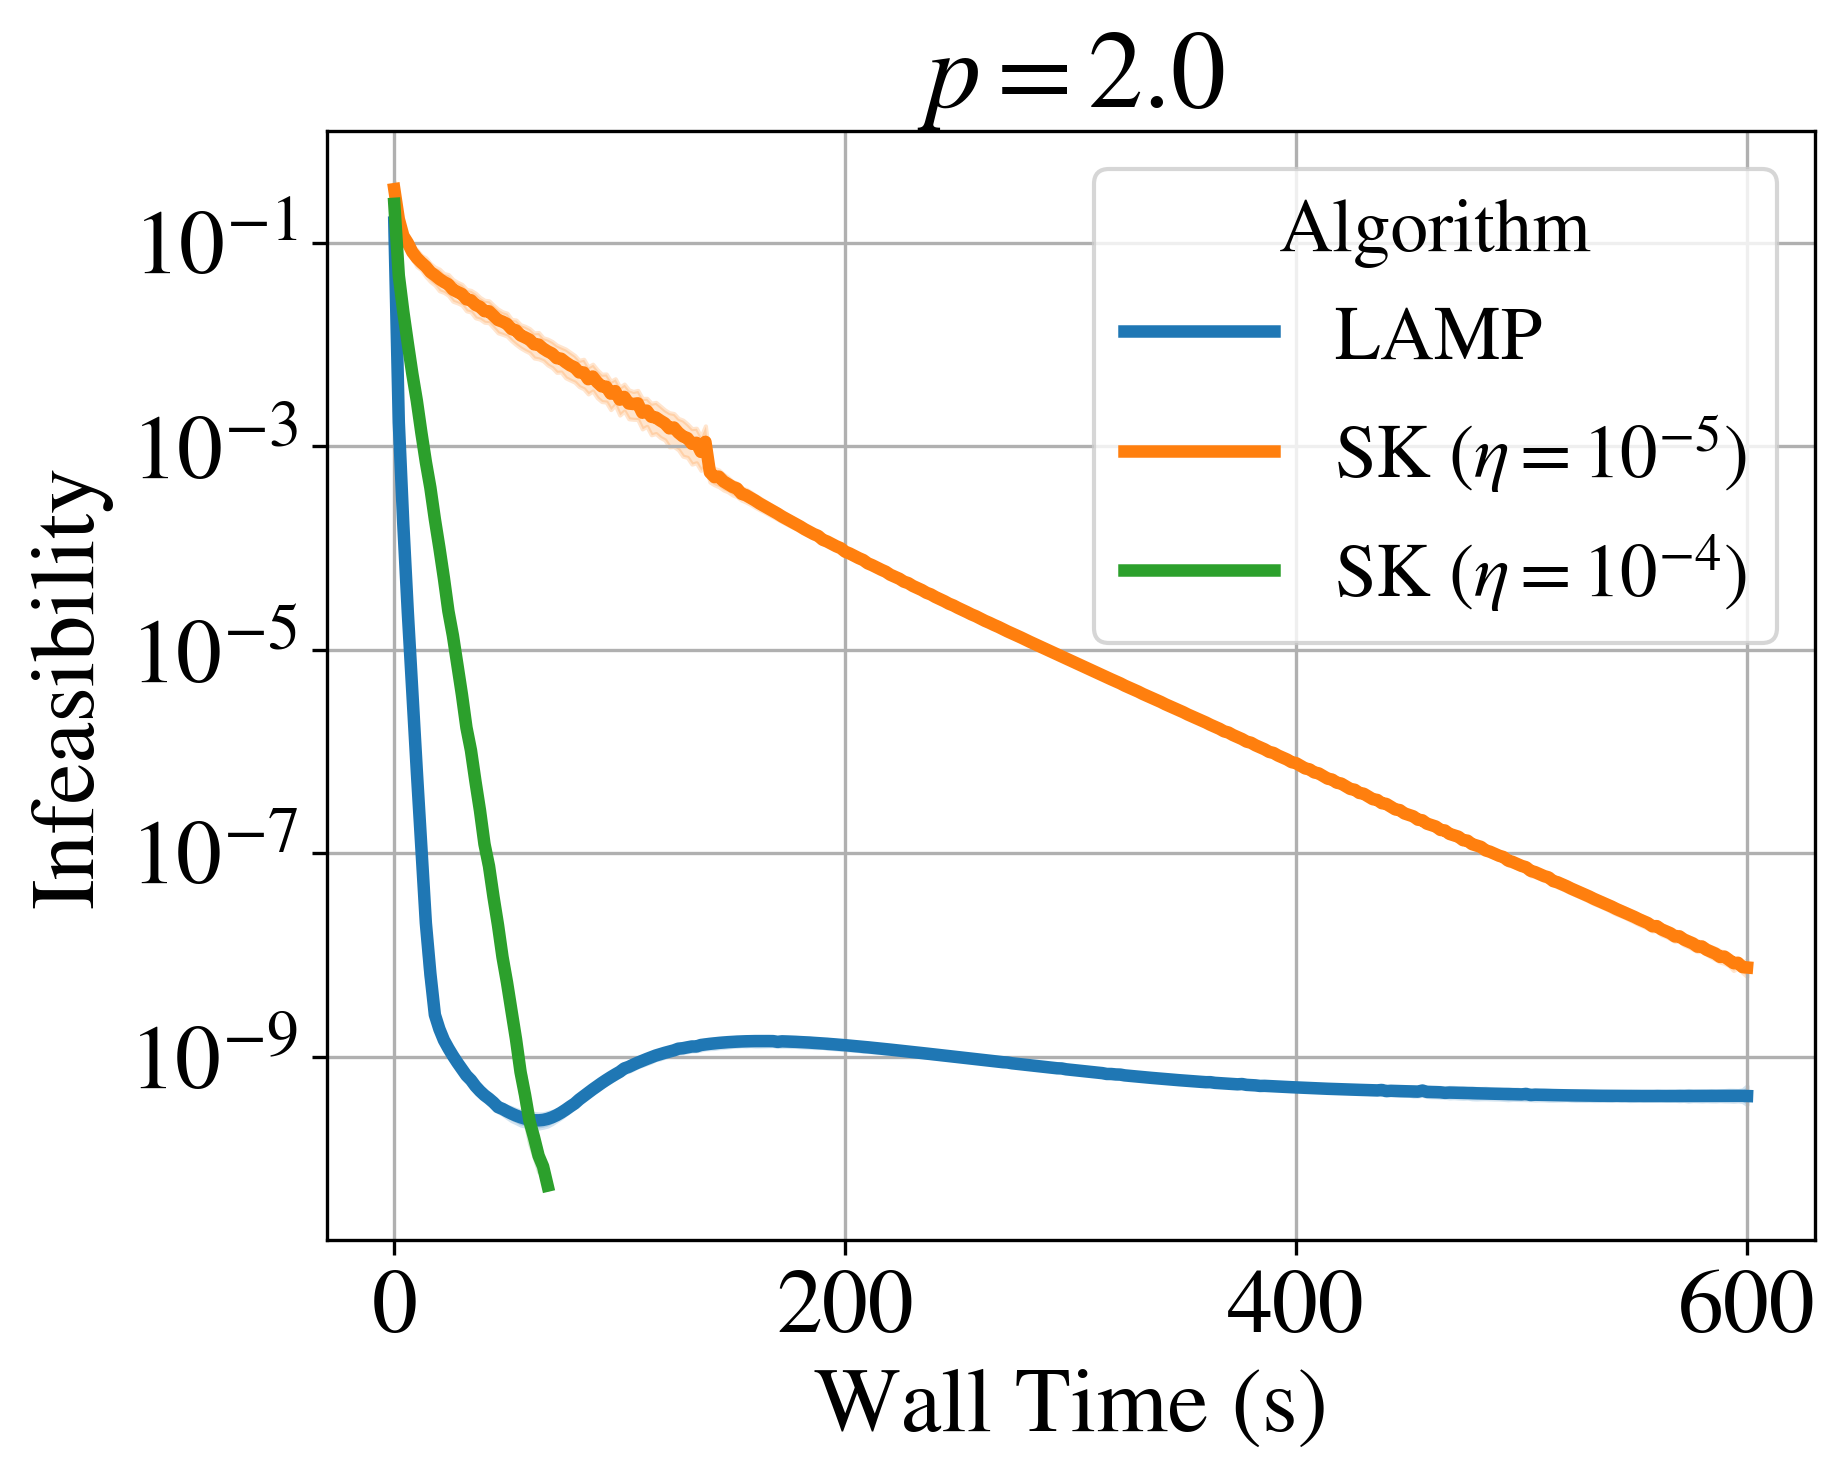

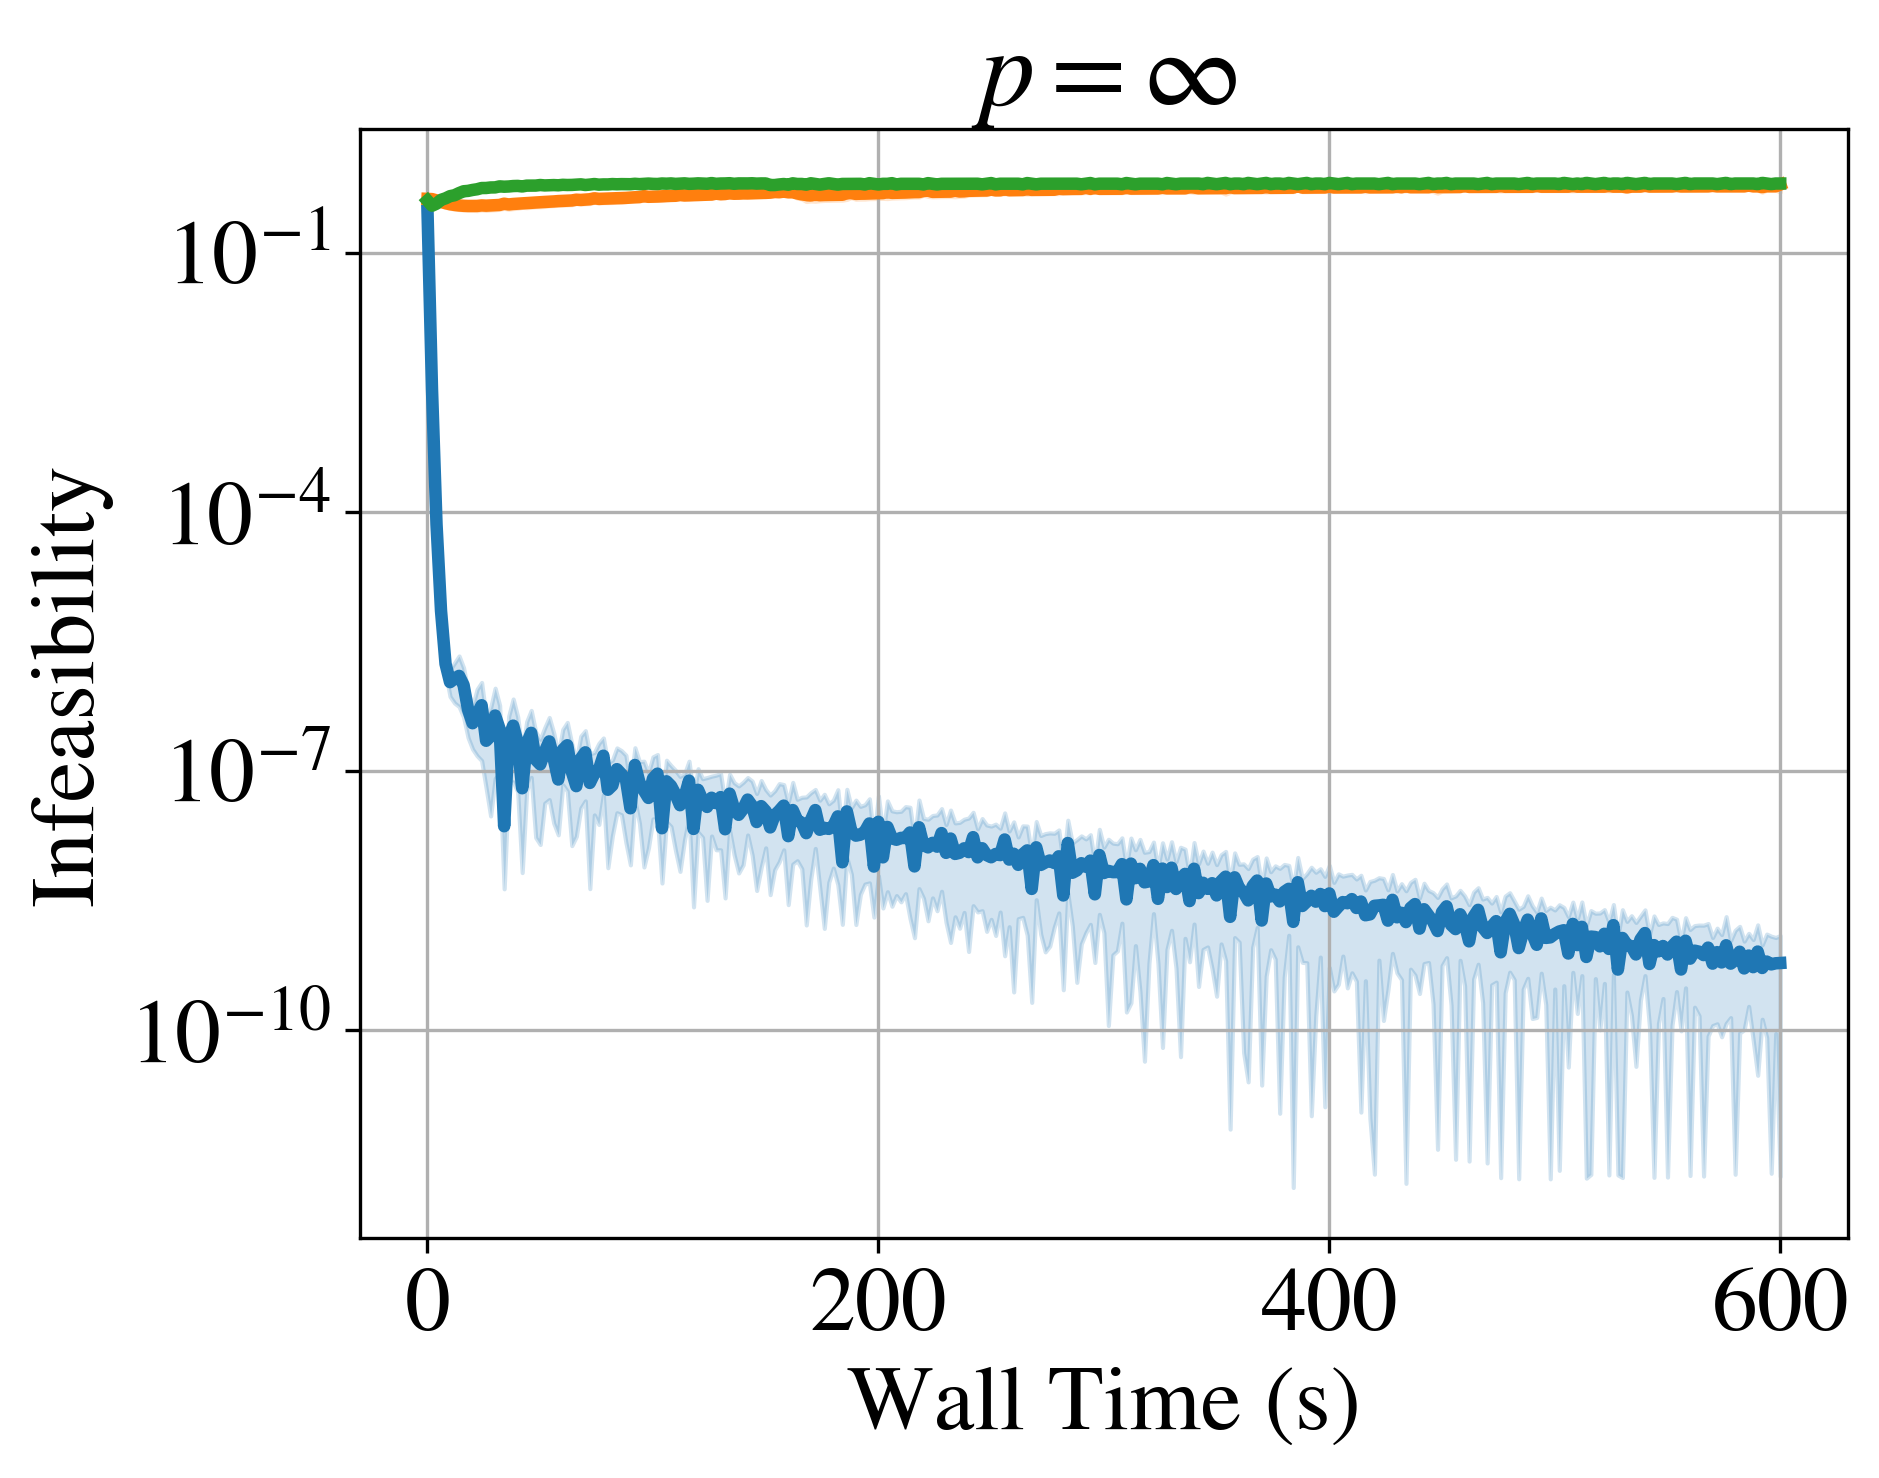

In [8]:
df=pd.read_csv("../data_archive/fig_4_timing.csv")
optimal_df = pd.read_csv("../data_archive/ground_truths_64_pnorms.csv") # exact minima found via emd2
df = df.merge(optimal_df, on=['problemclass', 'problem_1', 'problem_2', 'p'])
df['gap'] = abs(df['ot_objective'] - df['ot_distance']) + abs(df['infeas'])
# df["Algorithm"] = df['solver'].replace({"sinkhorn_kernel":"SK", "lamp_cuda_ctransfer": "LAMP"})
df["time(s)"] = (df["time(s)"]/2).round()*2
for p, sdf in df.groupby("p"):
    fig, ax = plt.subplots()
    first = True
    ax=sns.lineplot(sdf, x='time(s)', y='gap', hue='Algorithm',  palette='tab10',
                    legend=False if p != 2 or not first else True, 
                    hue_order=["LAMP", "SK ($\\eta = 10^{-5}$)","SK ($\\eta = 10^{-4}$)"], linewidth=3)
    first = False
    ax.set_yscale('log')
    ax.grid()
    
    if p==2:
        ax.legend(fontsize=18, title='Algorithm', title_fontsize=18)
    if p != np.inf:
        ax.set_title("$p=%s$" % (str(p)))
    else:
        ax.set_title("$p=\\infty$")
    ax.set_ylabel("Objective Gap")
    ax.set_xlabel("Wall Time (s)")
    plt.show()
    fig.savefig("../figures/pnorm_test_4096_%s.pdf" % (str(p)), bbox_inches='tight')

for p, sdf in df.groupby("p"):
    fig, ax = plt.subplots()
    first = True
    ax=sns.lineplot(sdf, x='time(s)', y='infeas', hue='Algorithm',  palette='tab10',
                    legend=False if p != 2 or not first else True, 
                    hue_order=["LAMP", "SK ($\\eta = 10^{-5}$)","SK ($\\eta = 10^{-4}$)" ], linewidth=3)
    first = False
    ax.set_yscale('log')
    ax.grid()
    
    if p==2:
        ax.legend(fontsize=18, title='Algorithm', title_fontsize=18)
    if p != np.inf:
        ax.set_title("$p=%s$" % (str(p)))
    else:
        ax.set_title("$p=\\infty$")
    ax.set_ylabel("Infeasibility")
    ax.set_xlabel("Wall Time (s)")
    fig.savefig("../figures/pnorm_test_4096_%s_infeas.pdf" % (str(p)), bbox_inches='tight')
    plt.show()

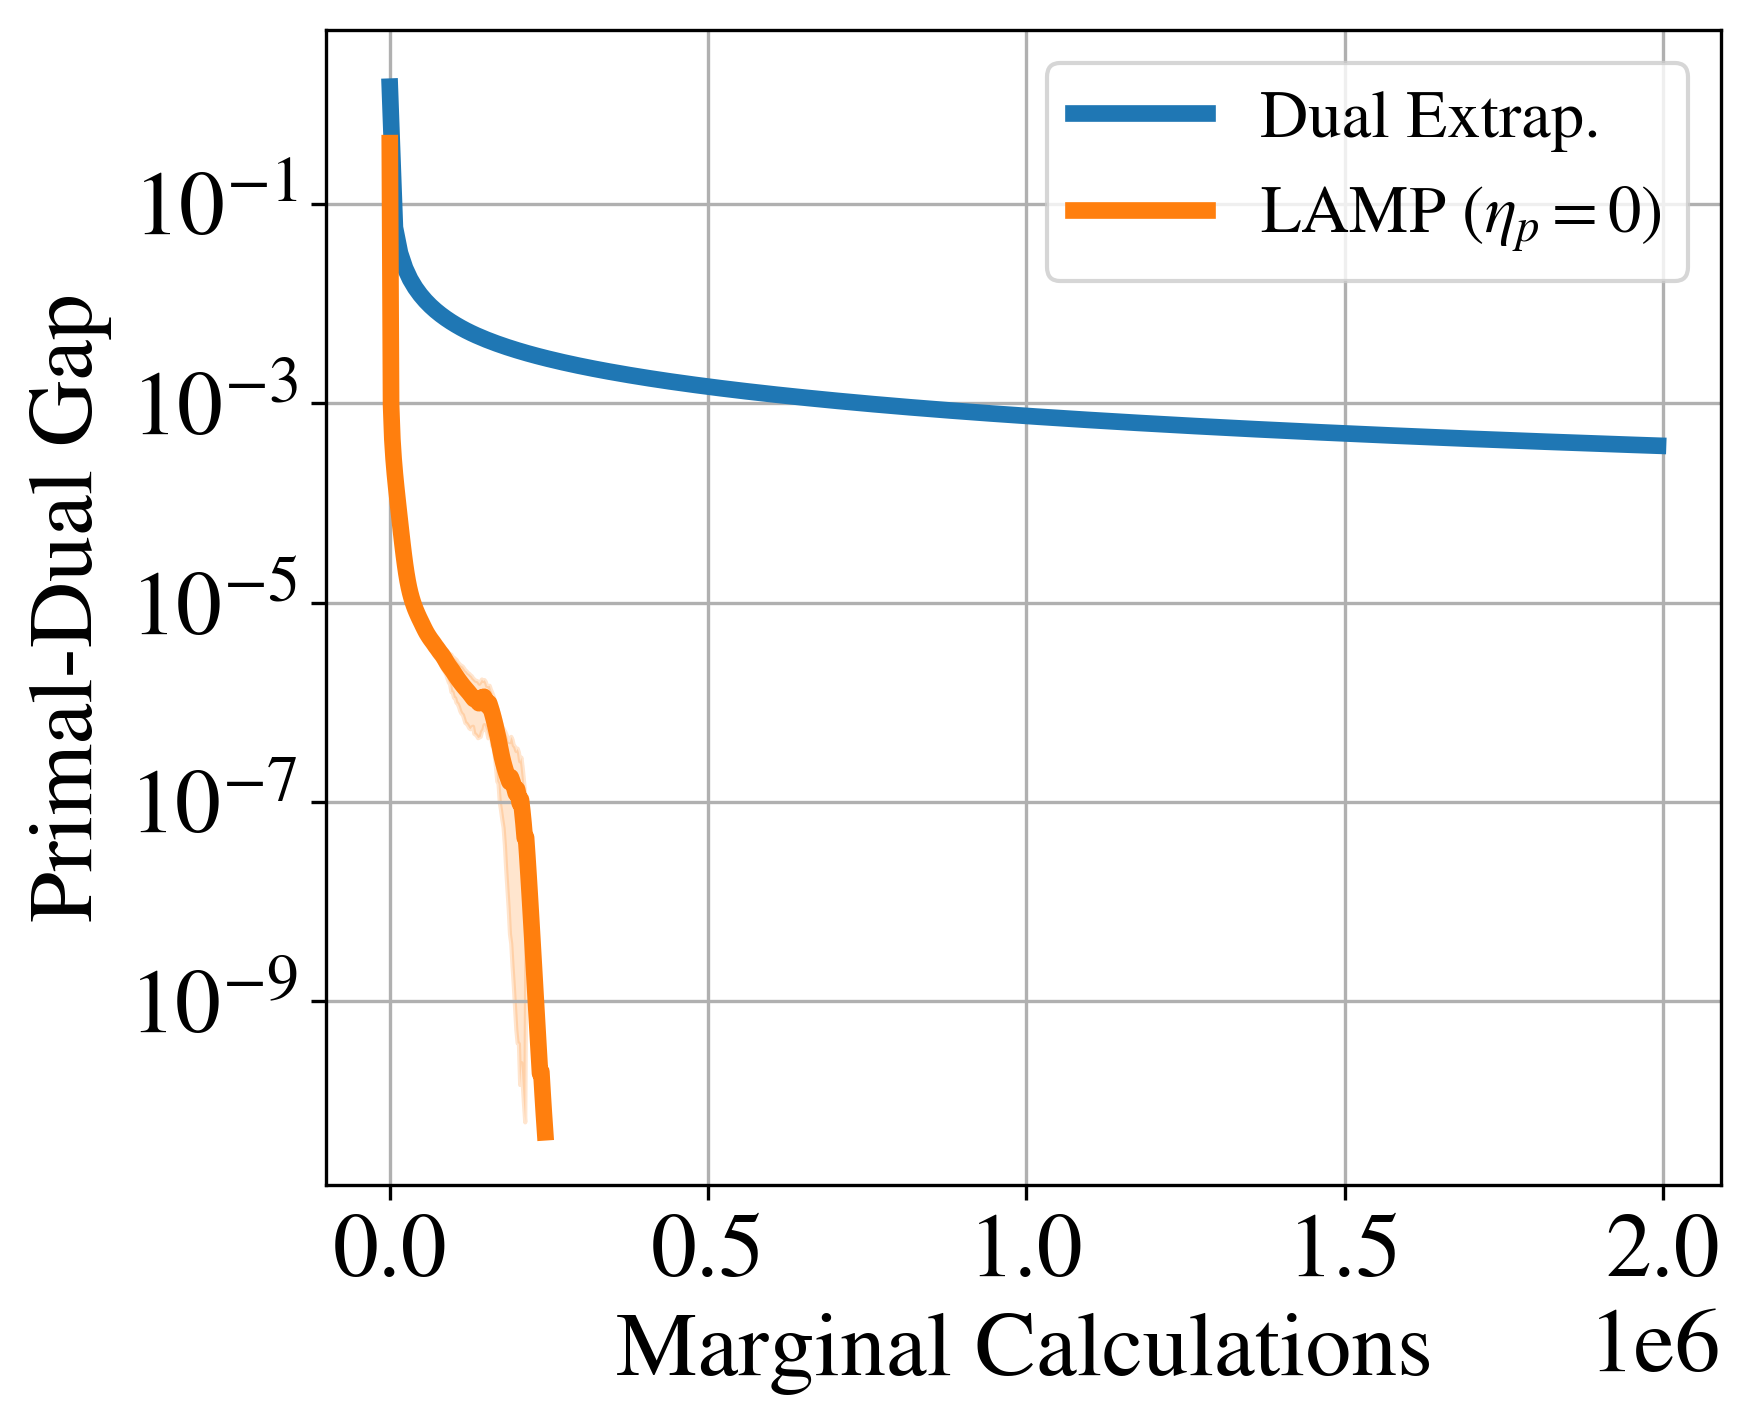

In [9]:
df = pd.read_csv("../data_archive/fig_5_dual_extrap_comp.csv")

fig, ax = plt.subplots(figsize=(6,5))
sns.lineplot(df.query("(iter-1) % 1000 == 0"),ax=ax, x='inner_iter', y='pdgap', hue='Algorithm', linewidth=4)
ax.set_yscale('log')
ax.set_ylabel("Primal-Dual Gap")
ax.set_xlabel("Marginal Calculations")
ax.legend(fontsize=16)
ax.grid()
fig.savefig("../figures/dextrap_comparison.pdf", bbox_inches="tight")